# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error
import pickle
from pathlib import Path

# Préparation des données

In [2]:
X_df = pd.read_csv("engie_X.csv", sep = ';')
y_df = pd.read_csv("engie_Y.csv", sep = ';')

In [3]:
X_df.head()

,ID,MAC_CODE,Date_time,Pitch_angle,Pitch_angle_min,Pitch_angle_max,Pitch_angle_std,Hub_temperature,Hub_temperature_min,Hub_temperature_max,...,Rotor_speed,Rotor_speed_min,Rotor_speed_max,Rotor_speed_std,Rotor_bearing_temperature,Rotor_bearing_temperature_min,Rotor_bearing_temperature_max,Rotor_bearing_temperature_std,Absolute_wind_direction_c,Nacelle_angle_c
0,1,WT3,1.0,92.470001,92.470001,92.470001,0.0,7.00,7.0,7.0,...,0.0,0.0,0.0,0.0,2.4,2.4,2.4,0.0,294.19000,294.23999
1,2,WT3,2.0,92.470001,92.470001,92.470001,0.0,7.00,7.0,7.0,...,0.0,0.0,0.0,0.0,2.4,2.4,2.4,0.0,297.82999,294.23999
2,3,WT3,3.0,92.470001,92.470001,92.470001,0.0,7.00,7.0,7.0,...,0.0,0.0,0.0,0.0,2.4,2.4,2.4,0.0,322.20999,294.23999
3,4,WT3,4.0,92.470001,92.470001,92.470001,0.0,6.97,6.7,7.0,...,0.0,0.0,0.0,0.0,2.4,2.4,2.4,0.0,318.69000,294.23999
4,5,WT3,5.0,92.470001,92.470001,92.470001,0.0,6.93,6.0,7.0,...,0.0,0.0,0.0,0.0,2.4,2.4,2.5,0.0,314.89001,294.23999


In [4]:
y_df.head()

,ID,TARGET
0,1,-0.703
1,2,-0.747
2,3,-0.791
3,4,-0.736
4,5,-1.055


In [5]:
len(X_df)

617386

In [6]:
len(X_df.columns)

78

In [7]:
X_df.columns

Index(['ID', 'MAC_CODE', 'Date_time', 'Pitch_angle', 'Pitch_angle_min',
       'Pitch_angle_max', 'Pitch_angle_std', 'Hub_temperature',
       'Hub_temperature_min', 'Hub_temperature_max', 'Hub_temperature_std',
       'Generator_converter_speed', 'Generator_converter_speed_min',
       'Generator_converter_speed_max', 'Generator_converter_speed_std',
       'Generator_speed', 'Generator_speed_min', 'Generator_speed_max',
       'Generator_speed_std', 'Generator_bearing_1_temperature',
       'Generator_bearing_1_temperature_min',
       'Generator_bearing_1_temperature_max',
       'Generator_bearing_1_temperature_std',
       'Generator_bearing_2_temperature',
       'Generator_bearing_2_temperature_min',
       'Generator_bearing_2_temperature_max',
       'Generator_bearing_2_temperature_std', 'Generator_stator_temperature',
       'Generator_stator_temperature_min', 'Generator_stator_temperature_max',
       'Generator_stator_temperature_std', 'Gearbox_bearing_1_temperature',
    

On va travailler que sur la 1ère turbine

In [8]:
df = X_df.merge(y_df, on="ID", how="inner")
#Filtrer UNE turbine : WT1
df_wt1 = df[df["MAC_CODE"] == "WT1"].copy()

In [9]:
df_wt1.head(10)

,ID,MAC_CODE,Date_time,Pitch_angle,Pitch_angle_min,Pitch_angle_max,Pitch_angle_std,Hub_temperature,Hub_temperature_min,Hub_temperature_max,...,Rotor_speed_min,Rotor_speed_max,Rotor_speed_std,Rotor_bearing_temperature,Rotor_bearing_temperature_min,Rotor_bearing_temperature_max,Rotor_bearing_temperature_std,Absolute_wind_direction_c,Nacelle_angle_c,TARGET
462679,462680,WT1,1.0,92.410004,92.410004,92.410004,0.0,8.24,8.0,9.0,...,0.0,0.0,0.0,2.38,2.3,2.5,0.06,301.44000,302.89999,-2.727
462680,462681,WT1,2.0,92.410004,92.410004,92.410004,0.0,8.19,8.0,9.0,...,0.0,0.0,0.0,2.42,2.3,2.5,0.07,299.73999,302.89999,-2.782
462681,462682,WT1,3.0,92.410004,92.410004,92.410004,0.0,8.90,8.0,9.0,...,0.0,0.0,0.0,2.42,2.3,2.5,0.07,332.13000,302.89999,-2.837
462682,462683,WT1,4.0,92.410004,92.410004,92.410004,0.0,7.62,8.0,9.0,...,0.0,0.0,0.0,2.40,2.3,2.5,0.07,322.01999,302.89999,-2.551
462683,462684,WT1,5.0,92.410004,92.410004,92.410004,0.0,7.09,7.0,8.0,...,0.0,0.0,0.0,2.41,2.3,2.5,0.07,322.75000,302.89999,-3.189
462684,462685,WT1,6.0,92.410004,92.410004,92.410004,0.0,7.72,7.0,8.0,...,0.0,0.0,0.0,2.32,2.3,2.5,0.08,310.39001,302.89999,-1.781
462685,462686,WT1,7.0,92.410004,92.410004,92.410004,0.0,6.83,7.0,8.0,...,0.0,0.0,0.0,2.32,2.3,2.5,0.03,303.25000,302.89999,0.100
462686,462687,WT1,8.0,92.410004,92.410004,92.410004,0.0,6.06,6.0,7.0,...,0.0,0.0,0.0,2.32,2.3,2.5,0.04,300.10999,302.89999,0.100
462687,462688,WT1,9.0,92.410004,92.410004,92.410004,0.0,5.94,6.0,7.0,...,0.0,0.0,0.0,2.32,2.3,2.5,0.04,297.50000,302.89999,0.100
462688,462689,WT1,10.0,92.410004,92.410004,92.410004,0.0,5.31,5.0,6.0,...,0.0,0.0,0.0,2.31,2.3,2.5,0.04,294.22000,302.89999,0.100


In [10]:
len(df_wt1)

154707

## Supprimer les doublons

In [11]:
df_wt1 = df_wt1.sort_values("Date_time").reset_index(drop=True)
df_wt1["Date_time"].diff().describe()

count    154706.000000
mean          1.019217
std           2.471570
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         657.000000
Name: Date_time, dtype: float64

In [12]:
df_wt1["Date_time"].value_counts()

Date_time
12539.0    2
12540.0    2
64953.0    2
64954.0    2
64955.0    2
          ..
669.0      1
670.0      1
671.0      1
672.0      1
1.0        1
Name: count, Length: 154689, dtype: int64

In [13]:
df_wt1["Date_time"].duplicated().sum()

np.int64(18)

Garder la ligne avec le moins de NaN

In [14]:
df_wt1 = df[df["MAC_CODE"] == "WT1"].copy()
df_wt1 = df_wt1.sort_values("Date_time")

# score = nombre de NaN (plus petit = mieux)
df_wt1["_nan_count"] = df_wt1.isna().sum(axis=1)

df_wt1 = (
    df_wt1.sort_values(["Date_time", "_nan_count"])
         .drop_duplicates(subset=["Date_time"], keep="first")
         .drop(columns=["_nan_count"])
         .reset_index(drop=True)
)

In [15]:
df_wt1["Date_time"].duplicated().sum()

np.int64(0)

## Nans


In [16]:
na_ratio = df_wt1.isna().mean().sort_values(ascending=False)
na_ratio.head(15)

Grid_voltage_max                 0.191914
Grid_voltage_min                 0.191914
Grid_voltage                     0.191914
Grid_voltage_std                 0.191914
Generator_converter_speed_min    0.013033
Generator_converter_speed_max    0.013033
Generator_converter_speed_std    0.013033
Gearbox_inlet_temperature_std    0.013033
Gearbox_inlet_temperature_max    0.013033
Gearbox_inlet_temperature_min    0.013033
Gearbox_inlet_temperature        0.013033
Generator_converter_speed        0.013033
ID                               0.000000
MAC_CODE                         0.000000
Date_time                        0.000000
dtype: float64

Dans un contexte de séries temporelles industrielles, la suppression de lignes pour cause de valeurs manquantes, même en faible proportion, peut introduire un biais structurel en éliminant certains régimes de fonctionnement. Une stratégie d’imputation est donc privilégiée.

In [17]:
df_wt1["Generator_converter_speed"].isna().sum()

np.int64(2016)

L’analyse des ratios de valeurs manquantes montre que la majorité des variables présentent très peu de NaN, à l’exception de la famille `Grid_voltage`, pour laquelle environ 20 % des valeurs sont manquantes. Ces absences sont plausibles dans un contexte industriel (indisponibilité de la mesure réseau, arrêts, ou données SCADA partielles) et ne traduisent pas une corruption systématique des données.

Dans un premier temps, aucune variable n’est supprimée uniquement en raison de la présence de NaN. L’ensemble des colonnes est conservé afin d’évaluer objectivement leur utilité pour la modélisation. Les valeurs manquantes seront traitées ultérieurement, après le découpage temporel du dataset, par des méthodes d’imputation adaptées au modèle (par exemple imputation par la médiane du jeu d’entraînement et, si nécessaire, ajout d’indicateurs de valeurs manquantes).

Cette approche permet d’éviter toute fuite d’information, de préserver un maximum de données, et de décider du maintien ou non de certaines variables sur la base de leur contribution réelle aux performances du modèle.


## Split Train/Test/Valid (80/15/15)

In [18]:
# Colonnes à exclure des features
dt = df_wt1["Date_time"].copy()
meta_cols = ["ID", "MAC_CODE", "Date_time", "TARGET"]

X = df_wt1.drop(columns=meta_cols, errors="ignore")
y = df_wt1["TARGET"]

print("X shape :", X.shape)
print("y shape :", y.shape)

X shape : (154689, 75)
y shape : (154689,)


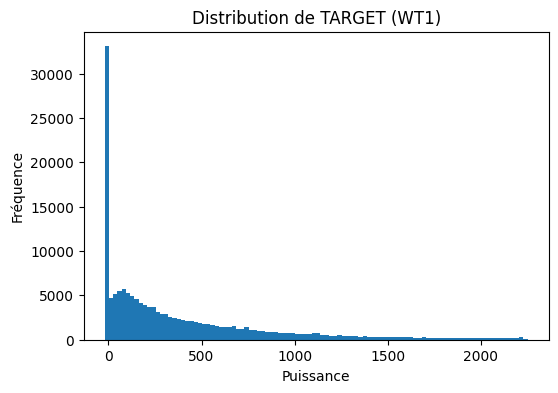

count    154689.000000
mean        385.730581
std         471.260706
min         -19.469001
25%          29.778000
50%         208.528000
75%         566.952011
max        2250.997000
Name: TARGET, dtype: float64

In [19]:
plt.figure(figsize=(6,4))
plt.hist(y, bins=100)
plt.title("Distribution de TARGET (WT1)")
plt.xlabel("Puissance")
plt.ylabel("Fréquence")
plt.show()
y.describe()

In [20]:
n = len(df_wt1)
train_end = int(0.70 * n)
val_end   = int(0.85 * n)

X_train, y_train = X.iloc[:train_end], y.iloc[:train_end]
X_val,   y_val   = X.iloc[train_end:val_end], y.iloc[train_end:val_end]
X_test,  y_test  = X.iloc[val_end:], y.iloc[val_end:]

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)
print("Date_time train:", df_wt1["Date_time"].iloc[0], "→", df_wt1["Date_time"].iloc[train_end-1])
print("Date_time val  :", df_wt1["Date_time"].iloc[train_end], "→", df_wt1["Date_time"].iloc[val_end-1])
print("Date_time test :", df_wt1["Date_time"].iloc[val_end], "→", df_wt1["Date_time"].iloc[-1])
# Analyse préliminaire des données pour une turbine éolienne spécifique (WT1)

Train: (108282, 75) Val: (23203, 75) Test: (23204, 75)
Date_time train: 1.0 → 110996.0
Date_time val  : 110997.0 → 134463.0
Date_time test : 134464.0 → 157680.0


In [21]:
dt_train = dt.iloc[:train_end]
dt_val   = dt.iloc[train_end:val_end]
dt_test  = dt.iloc[val_end:]

In [22]:
print("MAE naive baseline (median train) sur Val/Test :")
median_train = y_train.median()
mae_val  = (y_val - median_train).abs().mean()
mae_test = (y_test - median_train).abs().mean()
print("Val MAE :", mae_val)
print("Test MAE:", mae_test)

MAE naive baseline (median train) sur Val/Test :
Val MAE : 266.7976571196201
Test MAE: 357.5646299767398


## Analyse graphique

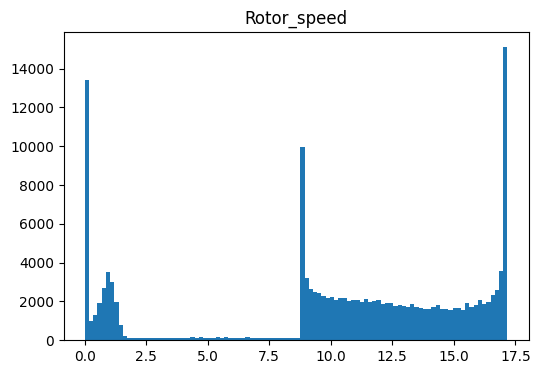

Rotor_speed
count    154689.000000
mean         10.365622
std           5.648686
min           0.000000
25%           8.800000
50%          11.360000
75%          15.060000
max          17.180000
Name: Rotor_speed, dtype: float64
----------------------------------------


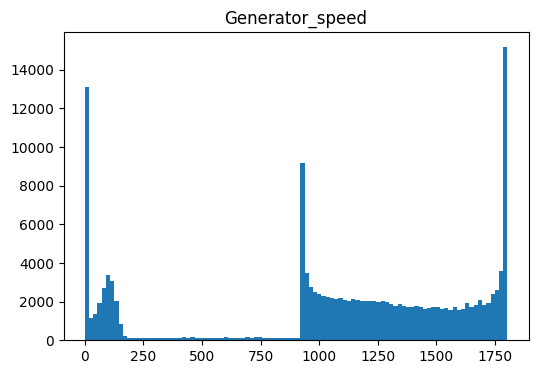

Generator_speed
count    154689.000000
mean       1090.300031
std         592.929159
min          -0.150000
25%         927.030030
50%        1196.120000
75%        1583.020000
max        1803.740000
Name: Generator_speed, dtype: float64
----------------------------------------


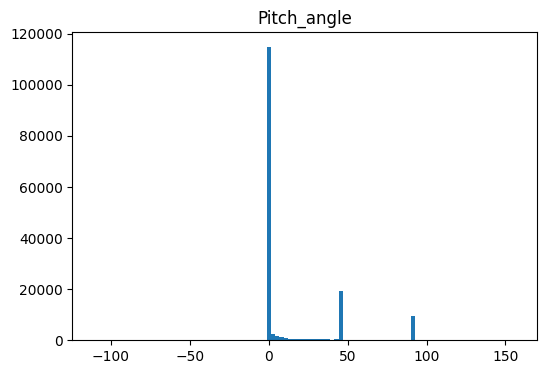

Pitch_angle
count    154689.000000
mean         11.913376
std          26.103501
min        -111.000000
25%          -1.010000
50%          -1.000000
75%           2.700000
max         156.820010
Name: Pitch_angle, dtype: float64
----------------------------------------


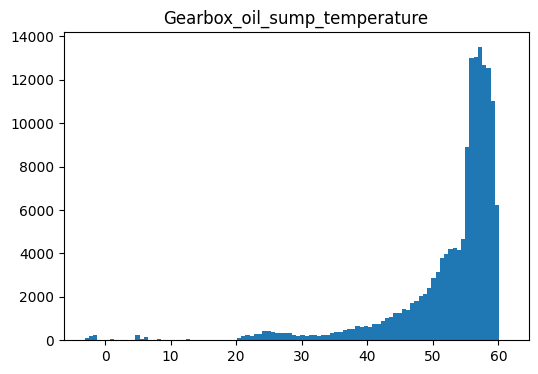

Gearbox_oil_sump_temperature
count    154689.000000
mean         52.622583
std           8.896436
min          -3.100000
25%          51.080002
50%          55.810001
75%          57.730000
max          61.389999
Name: Gearbox_oil_sump_temperature, dtype: float64
----------------------------------------


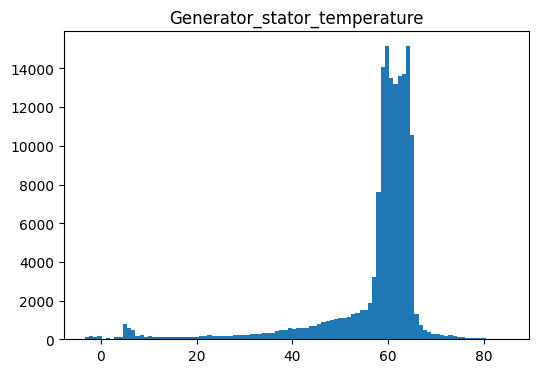

Generator_stator_temperature
count    154689.000000
mean         57.536390
std          11.632828
min          -3.400000
25%          58.279999
50%          60.709999
75%          63.259998
max          84.989998
Name: Generator_stator_temperature, dtype: float64
----------------------------------------


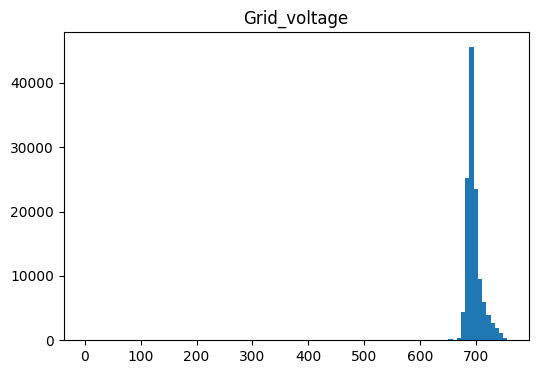

Grid_voltage
count    125002.000000
mean        696.308037
std          21.172559
min           0.000000
25%         688.530030
50%         693.590030
75%         700.760010
max         756.419980
Name: Grid_voltage, dtype: float64
----------------------------------------


In [23]:
cols_to_check = [
    "Rotor_speed",
    "Generator_speed",
    "Pitch_angle",
    "Gearbox_oil_sump_temperature",
    "Generator_stator_temperature",
    "Grid_voltage"
]

for col in cols_to_check:
    plt.figure(figsize=(6,4))
    plt.hist(X[col], bins=100)
    plt.title(col)
    plt.show()

    print(col)
    print(X[col].describe())
    print("-" * 40)


Les distributions des principales variables mécaniques, de commande et thermiques sont physiquement cohérentes et mettent en évidence plusieurs régimes de fonctionnement (arrêt, transition, production). Aucune anomalie grossière ou corruption de capteur n’est observée à ce stade, ce qui confirme la qualité globale des données.

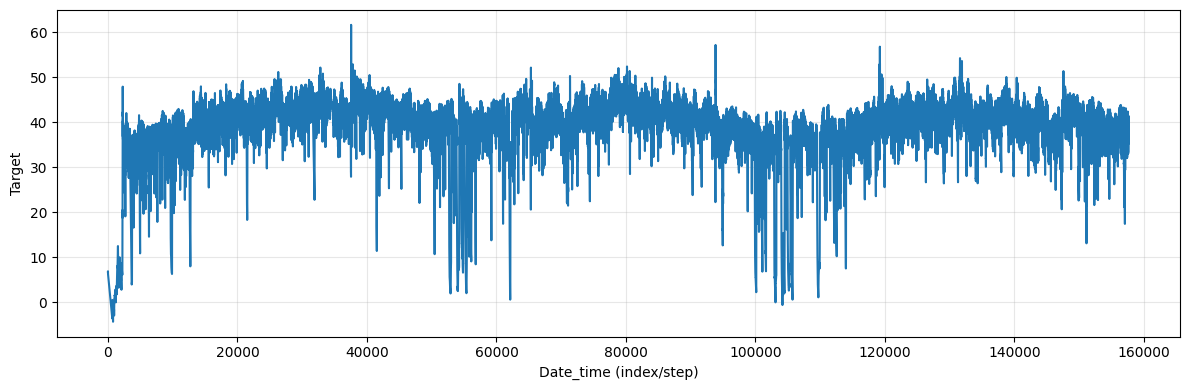

In [24]:
a = df_wt1["Date_time"].astype(float)   # ou "Date time" selon ton vrai nom de colonne
b = df_wt1["Generator_bearing_2_temperature"]

plt.figure(figsize=(12,4))
plt.plot(a, b)
plt.xlabel("Date_time (index/step)")
plt.ylabel("Target")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

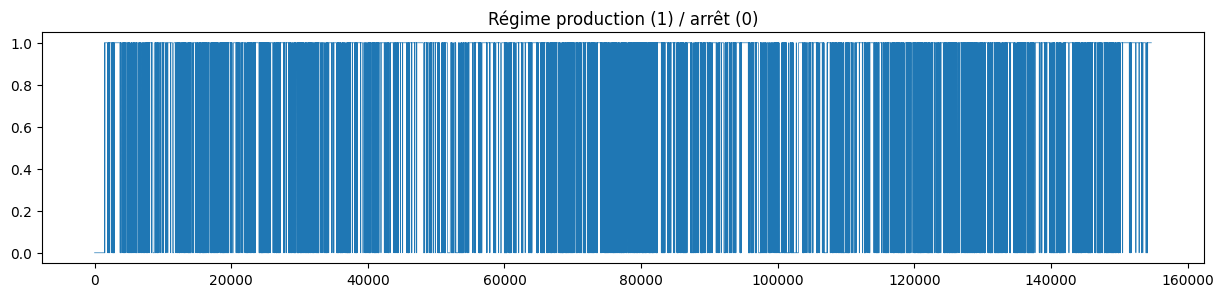

In [25]:
is_producing = df_wt1["TARGET"] > 50  # seuil à ajuster
plt.figure(figsize=(15,3))
plt.plot(is_producing.astype(int), linewidth=0.5)
plt.title("Régime production (1) / arrêt (0)")
plt.show()

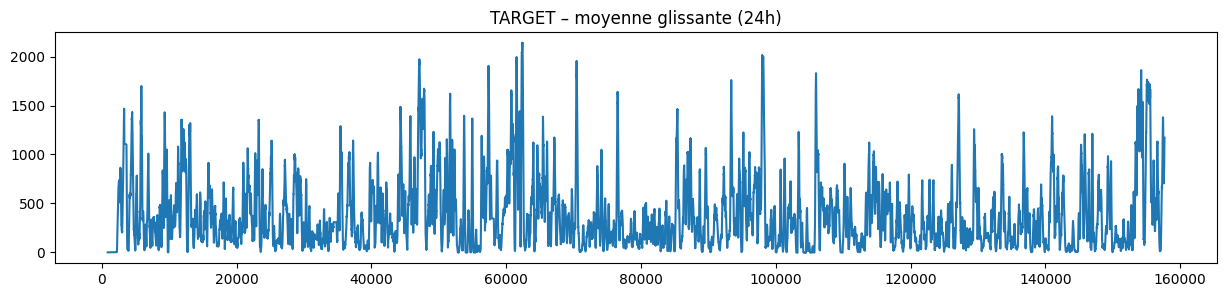

In [26]:
plt.figure(figsize=(15,3))
plt.plot(df_wt1["Date_time"], df_wt1["TARGET"].rolling(144).mean())
plt.title("TARGET – moyenne glissante (24h)")
plt.show()

La puissance produite présente une alternance claire entre périodes d’arrêt et périodes de production, avec une forte variabilité à court terme et sans dérive globale évidente sur l’horizon observé. Cette structure confirme la nécessité de prendre en compte les régimes de fonctionnement dans les étapes ultérieures de modélisation.

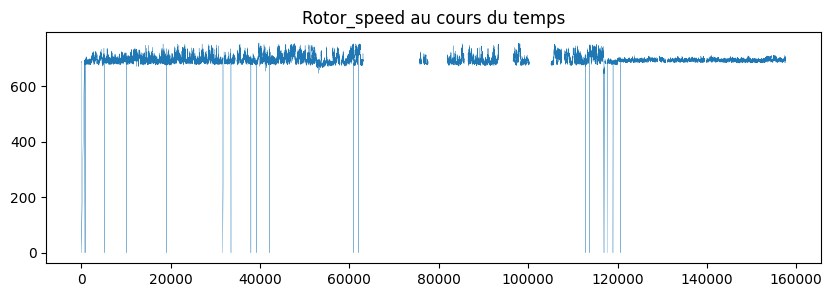

In [27]:
plt.figure(figsize=(10,3))
plt.plot(df_wt1["Date_time"], df_wt1["Grid_voltage"], linewidth=0.2)
plt.title("Rotor_speed au cours du temps")
plt.show()

## Corrélation

In [28]:
corrs = X.corrwith(y).sort_values(key=np.abs, ascending=False)

corrs.head(20)

Rotor_speed_min                      0.743432
Generator_converter_speed_min        0.742261
Generator_speed_min                  0.742190
Rotor_speed                          0.741177
Generator_converter_speed            0.740278
Generator_speed                      0.740271
Rotor_speed_max                      0.684517
Generator_speed_max                  0.684123
Generator_converter_speed_max        0.684003
Gearbox_bearing_2_temperature        0.598374
Gearbox_bearing_2_temperature_min    0.597403
Gearbox_bearing_1_temperature        0.594137
Gearbox_bearing_1_temperature_max    0.590431
Gearbox_bearing_2_temperature_max    0.585010
Gearbox_bearing_1_temperature_min    0.582242
Grid_voltage_max                     0.517213
Grid_voltage                         0.500477
Grid_voltage_min                     0.398887
Generator_stator_temperature_max     0.381590
Pitch_angle                         -0.377120
dtype: float64

Corrélation en régime productif seulement

In [29]:
mask_prod = y > 50  # seuil à ajuster
corrs_prod = X[mask_prod].corrwith(y[mask_prod]).sort_values(key=np.abs, ascending=False)
corrs_prod.head(15)

Rotor_speed                          0.854614
Generator_speed                      0.854361
Generator_converter_speed            0.854242
Rotor_speed_min                      0.799962
Generator_speed_min                  0.798951
Generator_converter_speed_min        0.798751
Generator_converter_speed_max        0.760644
Generator_speed_max                  0.760458
Rotor_speed_max                      0.760372
Grid_voltage                         0.746546
Grid_voltage_max                     0.744376
Gearbox_bearing_1_temperature        0.735092
Gearbox_bearing_1_temperature_max    0.718273
Grid_voltage_min                     0.701265
Gearbox_bearing_2_temperature        0.692293
dtype: float64

Corrélation en régime pas productif seulement

In [30]:
mask_prod = y < 50  # seuil à ajuster
corrs_prod = X[mask_prod].corrwith(y[mask_prod]).sort_values(key=np.abs, ascending=False)
corrs_prod.head(15)

Generator_converter_speed              0.796904
Generator_speed                        0.795798
Rotor_speed                            0.795597
Generator_converter_speed_min          0.705221
Generator_speed_min                    0.703666
Rotor_speed_min                        0.703505
Generator_converter_speed_max          0.679529
Generator_speed_max                    0.679183
Rotor_speed_max                        0.679045
Pitch_angle                           -0.656954
Pitch_angle_max                       -0.625775
Generator_stator_temperature_std       0.625435
Pitch_angle_min                       -0.613212
Generator_bearing_1_temperature_std    0.503387
Generator_bearing_2_temperature_std    0.474477
dtype: float64

## Feature engineering

Afin d’enrichir l’information fournie au modèle tout en conservant une interprétation physique claire, un ensemble limité de variables dérivées a été introduit. L’objectif n’est pas de remplacer l’apprentissage du réseau de neurones, mais de lui fournir des indicateurs synthétiques capturant des relations mécaniques, thermiques et de commande connues.

1. Ratio de transmission mécanique (`speed_ratio`)
Cette variable correspond au rapport entre la vitesse du générateur et celle du rotor. Elle approxime le rapport de transmission de la boîte de vitesses. En fonctionnement normal, ce ratio est quasi constant. Des variations peuvent indiquer des incohérences mécaniques (glissement, pertes, états transitoires), indépendamment du niveau de vent.

2. Différence de température des roulements générateur (`bearing_temp_diff`)
Les deux roulements du générateur sont soumis à des conditions similaires. La différence de température permet de détecter une asymétrie thermique, souvent plus informative qu’une température absolue, car elle est moins sensible à la charge globale et à l’environnement.

3. Coefficient de variation de la vitesse du rotor (`Rotor_speed_cv`)
Cette variable mesure la variabilité relative de la vitesse du rotor sur une fenêtre de 10 minutes. Elle caractérise la stabilité du régime de rotation et peut refléter des phénomènes de turbulence, de contrôle actif ou de transitions, qui influencent indirectement la performance énergétique.


In [31]:
X_f = X_train.copy()

# 1) Ratio de transmission
X_f["speed_ratio"] = (
    X_f["Generator_speed"] / (X_f["Rotor_speed"] + 1e-6)
)

# 2) Différence thermique roulements
X_f["bearing_temp_diff"] = (
    X_f["Generator_bearing_1_temperature"]
    - X_f["Generator_bearing_2_temperature"]
)

# 3) Coefficient de variation de la vitesse rotor
X_f["Rotor_speed_cv"] = (
    X_f["Rotor_speed_std"] / (X_f["Rotor_speed"] + 1e-6)
)



corr_fe = X_f[
    ["speed_ratio", "bearing_temp_diff", "Rotor_speed_cv"]
].corrwith(y_train).sort_values(key=np.abs, ascending=False)

corr_fe

bearing_temp_diff   -0.216040
speed_ratio         -0.116711
Rotor_speed_cv      -0.020284
dtype: float64

Bien que certaines variables issues du feature engineering présentent une corrélation linéaire faible avec la puissance active, elles sont conservées à ce stade car elles capturent des aspects physiques complémentaires (stabilité du régime, cohérence mécanique) susceptibles d’être exploités par un modèle non linéaire tel que notre réseau de neurones.


In [32]:
def add_physical_features(X):
    X = X.copy()

    # 1) Ratio de transmission mécanique (cohérence rotor ↔ générateur)
    X["speed_ratio"] = (
        X["Generator_speed"] / (X["Rotor_speed"] + 1e-6)
    )

    # 2) Asymétrie thermique des roulements générateur
    X["bearing_temp_diff"] = (
        X["Generator_bearing_1_temperature"]
        - X["Generator_bearing_2_temperature"]
    )

    # 3) Stabilité relative de la rotation du rotor
    X["Rotor_speed_cv"] = (
        X["Rotor_speed_std"] / (X["Rotor_speed"] + 1e-6)
    )

    return X

In [33]:
# Application STRICTEMENT identique sur tous les splits
X_train = add_physical_features(X_train)
X_val   = add_physical_features(X_val)
X_test  = add_physical_features(X_test)

Feature `fleet median` (contexte parc) pour WT1

On ajoute une variable basée sur la médiane des autres turbines au même timestamp afin de séparer les effets communs au parc (météo/saison/conditions réseau) des comportements propres à WT1. Pour chaque signal S, on calcule `S_idio = S_WT1 − median_fleet_S`. Cela stabilise la relation `X → TARGET` (meilleure généralisation) et rend les anomalies turbine-spécifiques plus visibles via les résidus (moins de faux positifs liés à des variations communes). La médiane n’est utilisée que si suffisamment de turbines sont valides au timestamp (sinon NaN, imputé ensuite).

In [34]:
# Count unique MAC_CODE values
X_df['MAC_CODE'].value_counts()

MAC_CODE
WT2    154791
WT1    154707
WT3    154253
WT4    153635
Name: count, dtype: int64

In [35]:
def add_others_median_idio_features(
    X: pd.DataFrame,
    dt: pd.Series,              # Date_time alignée avec X (même index)
    df_all: pd.DataFrame, 
          # contient Date_time + MAC_CODE + signaux
    signals: list,
    suffix_idio: str = "_idio",
    suffix_med: str = "_others_med",
    strict: bool = True         # True => exige WT2, WT3, WT4 valides (count==3)
) -> pd.DataFrame:
    """
    Ajoute à X (WT1) des features basées sur la médiane des autres turbines au même timestamp.
    X ne contient pas Date_time : on la fournit via dt.
    """
    X_out = X.copy()

    # autres turbines uniquement
    others = df_all[df_all["MAC_CODE"] != "WT1"][["Date_time", "MAC_CODE"] + signals].copy()

    med = others.groupby("Date_time")[signals].median()
    cnt = others.groupby("Date_time")[signals].count()

    if strict:
        med = med.where(cnt == 3)   # WT2, WT3, WT4 doivent être valides
    else:
        med = med.where(cnt >= 2)   # moins strict si trop de NaN

    # on aligne par Date_time (merge sur dt)
    med_cols = med.add_suffix(suffix_med)
    tmp = pd.DataFrame({"Date_time": dt.values}, index=X_out.index).join(med_cols, on="Date_time")

    X_out = X_out.join(tmp.drop(columns=["Date_time"]))

    # idiosyncratic = WT1 - median(others)
    for s in signals:
        X_out[s + suffix_idio] = X_out[s] - X_out[s + suffix_med]

    return X_out

In [36]:
# 1) Choisir les signaux sur lesquels faire le fleet median (recommandé : températures + vitesses)
signals_for_fleet = [
    "Rotor_speed",
    "Generator_speed",
    "Generator_converter_speed",
    "Gearbox_oil_sump_temperature",
    "Generator_stator_temperature",
    "Nacelle_temperature",
    "Outdoor_temperature",
]

X_train = add_others_median_idio_features(X_train, dt_train, X_df, signals_for_fleet, strict=True)
X_val   = add_others_median_idio_features(X_val,   dt_val,   X_df, signals_for_fleet, strict=True)
X_test  = add_others_median_idio_features(X_test,  dt_test,  X_df, signals_for_fleet, strict=True)

In [37]:
X_train.isna().sum().sort_values(ascending=False)

Grid_voltage                      27253
Grid_voltage_min                  27253
Grid_voltage_max                  27253
Grid_voltage_std                  27253
Generator_converter_speed_idio     4301
                                  ...  
Grid_frequency_std                    0
Rotor_bearing_temperature_max         0
Rotor_bearing_temperature_min         0
Rotor_speed_cv                        0
bearing_temp_diff                     0
Length: 92, dtype: int64

In [38]:
X_train.isna().mean().sort_values(ascending=False).head(20)

Grid_voltage                               0.251685
Grid_voltage_min                           0.251685
Grid_voltage_max                           0.251685
Grid_voltage_std                           0.251685
Generator_converter_speed_idio             0.039720
Generator_converter_speed_others_med       0.039720
Generator_stator_temperature_idio          0.021102
Gearbox_oil_sump_temperature_idio          0.021102
Generator_speed_others_med                 0.021102
Gearbox_oil_sump_temperature_others_med    0.021102
Generator_speed_idio                       0.021102
Rotor_speed_idio                           0.021102
Rotor_speed_others_med                     0.021102
Outdoor_temperature_others_med             0.021102
Nacelle_temperature_others_med             0.021102
Generator_stator_temperature_others_med    0.021102
Nacelle_temperature_idio                   0.021102
Outdoor_temperature_idio                   0.021102
Generator_converter_speed                  0.018618
Generator_co

In [39]:
def base_name(col: str) -> str:
    """
    Ramène un nom de feature à son 'tronc' (base),
    en supprimant les suffixes min/max/std et tes features fleet/idio.
    """
    # 1) exclure complètement les features dérivées fleet/idio
    # adapte les suffixes à ton naming exact
    if col.endswith("_others_med") or col.endswith("_idio"):
        return None

    # 2) enlever les stats fenêtre 10min
    for suf in ["_min", "_max", "_std"]:
        if col.endswith(suf):
            return col[:-len(suf)]

    return col

def get_base_columns(X: pd.DataFrame) -> list:
    """Retourne une liste de colonnes 'base' présentes dans X."""
    keep = []
    for c in X.columns:
        b = base_name(c)
        if b is None:
            continue
        # on garde seulement les colonnes déjà 'base' (pas *_min/max/std)
        # => c est base si base_name(c) == c
        if b == c:
            keep.append(c)
    return keep

def top_correlated_pairs(X: pd.DataFrame, cols: list, top_k=30, method="pearson"):
    """
    Renvoie les paires de colonnes les plus corrélées (absolu),
    en évitant les doublons et la diagonale.
    """
    C = X[cols].corr(method=method).abs()
    # garder seulement le triangle supérieur
    upper = C.where(np.triu(np.ones(C.shape), k=1).astype(bool))

    pairs = (
        upper.stack()
        .sort_values(ascending=False)
        .reset_index()
        .rename(columns={"level_0": "feat_1", "level_1": "feat_2", 0: "abs_corr"})
    )
    return pairs.head(top_k)

# ---- utilisation ----
base_cols = get_base_columns(X_train)  # ou X (avant split)
pairs = top_correlated_pairs(X_train, base_cols, top_k=10)
display(pairs)

,feat_1,feat_2,abs_corr
0,Nacelle_angle,Nacelle_angle_c,1.000000
1,Absolute_wind_direction,Absolute_wind_direction_c,1.000000
2,Generator_speed,Rotor_speed,0.999997
3,Generator_converter_speed,Generator_speed,0.999996
4,Generator_converter_speed,Rotor_speed,0.999995
5,Gearbox_bearing_1_temperature,Gearbox_bearing_2_temperature,0.990552
6,Hub_temperature,Outdoor_temperature,0.953467
7,Gearbox_inlet_temperature,Gearbox_oil_sump_temperature,0.936730
8,Generator_bearing_1_temperature,Generator_bearing_2_temperature,0.922287
9,Gearbox_bearing_2_temperature,Gearbox_oil_sump_temperature,0.921040


In [40]:
drop_now = ["Nacelle_angle_c", "Absolute_wind_direction_c", "Absolute_wind_direction",
            "Generator_speed", "Generator_speed_min", "Generator_speed_max", "Generator_speed_std", "Generator_speed_others_med", "Generator_speed_idio",
            "Generator_converter_speed", "Generator_converter_speed_min", "Generator_converter_speed_max", "Generator_converter_speed_std", "Generator_converter_speed_others_med", "Generator_converter_speed_idio"]

drop_now = [c for c in drop_now if c in X_train.columns]

X_train = X_train.drop(columns=drop_now)
X_val   = X_val.drop(columns=drop_now)
X_test  = X_test.drop(columns=drop_now)

print("Dropped:", drop_now)

Dropped: ['Nacelle_angle_c', 'Absolute_wind_direction_c', 'Absolute_wind_direction', 'Generator_speed', 'Generator_speed_min', 'Generator_speed_max', 'Generator_speed_std', 'Generator_speed_others_med', 'Generator_speed_idio', 'Generator_converter_speed', 'Generator_converter_speed_min', 'Generator_converter_speed_max', 'Generator_converter_speed_std', 'Generator_converter_speed_others_med', 'Generator_converter_speed_idio']


### Imputation

In [41]:
dt_diff = df_wt1["Date_time"].diff()

long_gaps = dt_diff[dt_diff > 1]

(long_gaps * 10 / 60).describe()  # en heures

count     63.000000
mean       8.079365
std       18.968443
min        0.333333
25%        0.333333
50%        0.833333
75%        5.833333
max      109.500000
Name: Date_time, dtype: float64

In [42]:
grid_cols = ["Grid_voltage", "Grid_voltage_min", "Grid_voltage_max", "Grid_voltage_std"]

# nombre de NaN par ligne sur ces 4 colonnes (0 à 4)
grid_nan_count = df_wt1[grid_cols].isna().sum(axis=1)

grid_nan_count.value_counts().sort_index()

0    125002
4     29687
Name: count, dtype: int64

On voit que les NaN Grid_voltage arrivent uniquement par blocs complets, donc un seul flag suffit pour créer le flag isNaN.

Maintenant on voit s'il y a une relation entre la manque  des données et notre Target pour voir est ce que la raison peut la lier à le disfonctionnement de notre turbine

In [43]:
mask_grid_nan = df_wt1[grid_cols].isna().all(axis=1)

df_wt1.loc[mask_grid_nan, "TARGET"].describe(), df_wt1.loc[~mask_grid_nan, "TARGET"].describe()

(count    29687.000000
 mean       320.878911
 std        411.967038
 min        -17.368000
 25%         13.927000
 50%        172.492000
 75%        458.398495
 max       2234.640000
 Name: TARGET, dtype: float64,
 count    125002.000000
 mean        401.132347
 std         483.000494
 min         -19.469001
 25%          33.925000
 50%         218.735989
 75%         596.085495
 max        2250.997000
 Name: TARGET, dtype: float64)

L’analyse montre que l’absence de la mesure de tension réseau ne correspond pas uniquement à des périodes d’arrêt, puisque la turbine peut produire à des niveaux significatifs lorsque Grid_voltage est manquant. L’information “manquant / présent” est donc conservée explicitement via un indicateur binaire, afin de permettre au modèle d’apprendre d’éventuels états opérationnels latents associés à l’indisponibilité de cette mesure.

On peut essayer de faire ca sur les autres variables

In [44]:
df_wt1["Grid_voltage_isnan"] = (grid_nan_count == 4).astype(int)

df_wt1.loc[df_wt1["Grid_voltage_isnan"]==1, "TARGET"].describe()

count    29687.000000
mean       320.878911
std        411.967038
min        -17.368000
25%         13.927000
50%        172.492000
75%        458.398495
max       2234.640000
Name: TARGET, dtype: float64

In [45]:
df_wt1.loc[df_wt1["Generator_converter_speed_std"].isna(), "TARGET"].describe()

count    2016.000000
mean      370.481097
std       476.568031
min       -14.090000
25%        10.519750
50%       194.145500
75%       506.949742
max      2214.608890
Name: TARGET, dtype: float64

Imputation des valeurs manquantes (pipeline robuste, sans fuite)

Après analyse, deux niveaux de valeurs manquantes ont été identifiés :
- **`Grid_voltage` (avg/min/max/std) ~19% NaN**, avec un schéma de "co-manquance" : les 4 colonnes sont soit toutes présentes, soit toutes absentes.
- **`Generator_converter_speed*` et `Gearbox_inlet_temperature*` ~1.3% NaN**, manquants ponctuellement.

 Principes retenus
1. **Aucune suppression de lignes** : préserver la structure temporelle.
2. **Un indicateur binaire unique** `Grid_voltage_isnan` est créé pour capturer l’information “mesure réseau indisponible”.
3. **Imputation hybride sur le TRAIN uniquement** :
   - *Carry-forward conditionnel* si l’interruption temporelle précédente est courte (≤ 2h) afin de rester physiquement cohérent.
   - *Imputation par médiane* (calculée sur le TRAIN) pour les NaN restants.
4. **Validation/Test** : uniquement imputation par médiane du TRAIN (pas de décision basée sur le futur).

Ce pipeline garantit l'absence de fuite d’information et conserve la cohérence physique des signaux.


In [46]:
# -----------------------------
# 0) Paramètres & colonnes NaN
# -----------------------------
MAX_CF_GAP = 12  # 12 pas * 10 min = 2 heures

grid_cols = ["Grid_voltage", "Grid_voltage_min", "Grid_voltage_max", "Grid_voltage_std"]


nan_cols = [
    "Grid_voltage_max",
    "Grid_voltage_min",
    "Grid_voltage",
    "Grid_voltage_std",
    "Gearbox_inlet_temperature_std",
    "Gearbox_inlet_temperature_max",
    "Gearbox_inlet_temperature_min",
    "Gearbox_inlet_temperature",
]

# ---------------------------------------------------
# Ajouter les colonnes fleet median / idiosyncratic à imputer (si présentes)
# ---------------------------------------------------
fleet_nan_cols = [c for c in X_train.columns if c.endswith("_others_med") or c.endswith("_idio")]
nan_cols = list(dict.fromkeys(nan_cols + fleet_nan_cols))  # concat + unique (garde l'ordre)

# Garder uniquement les colonnes existantes (sécurité)
nan_cols = [c for c in nan_cols if c in X_train.columns]
grid_cols = [c for c in grid_cols if c in X_train.columns]

# ---------------------------------------------------
# 1) Flag unique pour Grid_voltage* (train/val/test)
# ---------------------------------------------------
def add_grid_flag(X):
    # grid_nan_count = nombre de NaN parmi les 4 colonnes (0..4)
    grid_nan_count = X[grid_cols].isna().sum(axis=1)
    # Dans ton cas, c'est 0 ou 4 => flag binaire propre
    X = X.copy()
    X["Grid_voltage_isnan"] = (grid_nan_count == len(grid_cols)).astype(int)
    return X

X_train = add_grid_flag(X_train)
X_val   = add_grid_flag(X_val)
X_test  = add_grid_flag(X_test)

# ---------------------------------------------------
# 2) Imputation hybride sur TRAIN (carry-forward court)
# ---------------------------------------------------
# Date_time aligné avec X_train (important)
dt_train = df_wt1.loc[X_train.index, "Date_time"]
dt_diff_train = dt_train.diff()

# Carry-forward conditionnel (uniquement sur train)
# -> on ne remplit que si NaN ET gap <= 2h
for col in nan_cols:
    if col not in X_train.columns:
        continue
    mask_cf = X_train[col].isna() & (dt_diff_train <= MAX_CF_GAP)
    # ffill doit être appliqué sur la série entière (puis on sélectionne mask_cf)
    filled = X_train[col].ffill()
    X_train.loc[mask_cf, col] = filled.loc[mask_cf]

# ---------------------------------------------------
# 3) Imputation par médiane (fit sur TRAIN) + application
# ---------------------------------------------------
median_values = {}

for col in nan_cols:
    if col not in X_train.columns:
        continue
    med = X_train[col].median()  # après carry-forward partiel
    median_values[col] = med

    # Train
    X_train[col] = X_train[col].fillna(med)
    # Val/Test (pas de carry-forward, uniquement médiane du train)
    X_val[col]   = X_val[col].fillna(med)
    X_test[col]  = X_test[col].fillna(med)

In [47]:
X_train.isna().sum().sum(), X_val.isna().sum().sum(), X_test.isna().sum().sum()

(np.int64(0), np.int64(0), np.int64(0))

In [48]:
print(X_train[nan_cols].isna().mean().sort_values(ascending=False).head(5))

Grid_voltage_max                 0.0
Grid_voltage_min                 0.0
Grid_voltage                     0.0
Grid_voltage_std                 0.0
Gearbox_inlet_temperature_std    0.0
dtype: float64


In [49]:
q1 = df_wt1.quantile(0.25, numeric_only=True)
q3 = df_wt1.quantile(0.75, numeric_only=True)
iqr = (q3 - q1)

quasi_const_iqr = iqr[iqr < 1e-6].sort_values()

print("Nb quasi-constantes (IQR):", len(quasi_const_iqr))
quasi_const_iqr.head(30)

Nb quasi-constantes (IQR): 4


Pitch_angle_std       0.0
Nacelle_angle_std     0.0
Grid_frequency_std    0.0
Grid_voltage_isnan    0.0
dtype: float64

### ON/OFF

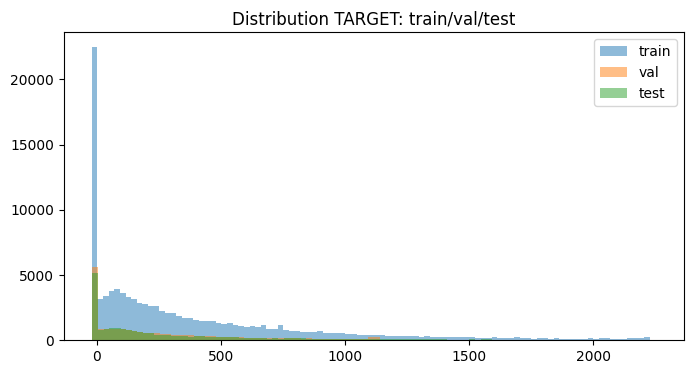

In [50]:
plt.figure(figsize=(8,4))
plt.hist(y_train, bins=100, alpha=0.5, label="train")
plt.hist(y_val, bins=100, alpha=0.5, label="val")
plt.hist(y_test, bins=100, alpha=0.5, label="test")
plt.legend()
plt.title("Distribution TARGET: train/val/test")
plt.show()

In [51]:
corrs = X_train.corrwith(y_train).sort_values(key=np.abs, ascending=False)
    
corrs.head(20)  

Rotor_speed_min                      0.744045
Rotor_speed                          0.738053
Rotor_speed_max                      0.679690
Rotor_speed_others_med               0.609515
Gearbox_bearing_2_temperature        0.578962
Gearbox_bearing_2_temperature_min    0.578641
Gearbox_bearing_1_temperature        0.573983
Gearbox_bearing_1_temperature_max    0.570720
Gearbox_bearing_2_temperature_max    0.566259
Gearbox_bearing_1_temperature_min    0.563106
Grid_voltage_max                     0.557822
Grid_voltage                         0.534729
Grid_voltage_min                     0.430667
Generator_stator_temperature_max     0.378951
Pitch_angle                         -0.377005
Generator_stator_temperature         0.375875
Pitch_angle_min                     -0.370054
Generator_stator_temperature_min     0.365219
Pitch_angle_max                     -0.350086
Generator_stator_temperature_std     0.343908
dtype: float64

Séparation des régimes OFF / ON (gating) avant le NBM

La série `TARGET` contient une forte proportion de valeurs proches de 0 (turbine arrêtée, mise en sécurité, curtailment, maintenance). Si on entraîne directement un modèle de régression (DNN) sur l’ensemble des points, l’optimisation MAE est dominée par ce régime majoritaire : le modèle apprend une prédiction “prudente” proche de 0 et sous-prédit la puissance en production, ce qui dégrade fortement la performance et rend les résidus peu exploitables pour la détection d’anomalies.

Pour éviter ce biais, on **sépare d’abord les observations en deux états opérationnels** :

- **OFF** : turbine non productive (puissance ~ 0). On ne cherche pas à “apprendre” une relation complexe ici ; la prédiction attendue est ~0 et l’intérêt principal est la détection d’événements (arrêts longs, curtailment).
- **ON** : turbine en production. C’est uniquement sur ce sous-ensemble que l’on entraîne le **Normal Behavior Model (NBM)** : le modèle apprend le comportement normal de la puissance en fonction des variables internes (vitesse, pitch, températures, etc.). Les anomalies seront ensuite détectées par des **résidus anormalement élevés** en régime ON.

Choix du seuil

Le seuil de séparation est défini de façon **physique et observable** à partir de la relation `TARGET` vs `Rotor_speed` (nuage de points). On constate un “coude” : en-dessous d’une certaine vitesse, `TARGET` reste collé à 0 ; au-delà, la puissance augmente de manière monotone.  
On fixe donc un seuil de puissance **ε = 9 ** pour définir la zone “quasi nulle” (OFF) :
- `OFF` si `Rotor_speed ≤ 9 `
- `ON` sinon

Ce choix (ε = 9) tolère le bruit de mesure et évite de classer comme ON des points où la turbine est nominalement arrêtée mais où la puissance n’est pas exactement 0.


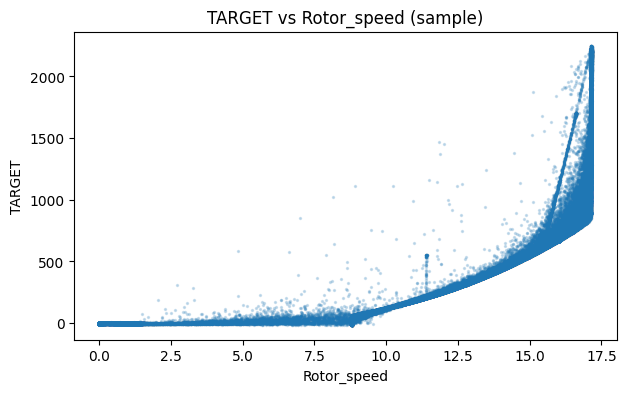

In [52]:
sample = X_train.sample(n=min(30000, len(X_train)), random_state=42)

plt.figure(figsize=(7,4))
plt.scatter(X_train["Rotor_speed"], y_train, s=2, alpha=0.2)
plt.xlabel("Rotor_speed")
plt.ylabel("TARGET")
plt.title("TARGET vs Rotor_speed (sample)")
plt.show()

In [53]:
# =========================
# 1) Seuil ON/OFF (brut)
# =========================
ON_TH  = 9.0   # ON si Rotor_speed >= 9.0
OFF_TH = 8.5   # OFF si Rotor_speed <= 8.5 (hystérésis)

# =========================
# 2) Masque ON simple
# =========================
mask_on_train = X_train["Rotor_speed"] >= ON_TH
mask_on_val   = X_val["Rotor_speed"]   >= ON_TH
mask_on_test  = X_test["Rotor_speed"]  >= ON_TH

X_train_on, y_train_on = X_train.loc[mask_on_train], y_train.loc[mask_on_train]
X_val_on,   y_val_on   = X_val.loc[mask_on_val],     y_val.loc[mask_on_val]
X_test_on,  y_test_on  = X_test.loc[mask_on_test],   y_test.loc[mask_on_test]

print("ON sizes:", X_train_on.shape, X_val_on.shape, X_test_on.shape)

# =========================
# 3) OFF dataset
# =========================
mask_off_train = X_train["Rotor_speed"] <= OFF_TH
mask_off_val   = X_val["Rotor_speed"]   <= OFF_TH
mask_off_test  = X_test["Rotor_speed"]  <= OFF_TH

X_train_off, y_train_off = X_train.loc[mask_off_train], y_train.loc[mask_off_train]
X_val_off,   y_val_off   = X_val.loc[mask_off_val],     y_val.loc[mask_off_val]
X_test_off,  y_test_off  = X_test.loc[mask_off_test],   y_test.loc[mask_off_test]

print("OFF sizes:", X_train_off.shape, X_val_off.shape, X_test_off.shape)

ON sizes: (77009, 78) (15514, 78) (15954, 78)
OFF sizes: (23744, 78) (5943, 78) (5145, 78)


In [77]:
# 4) Validation du seuil (qualité du gating)
#    "Faux ON" = ON mais TARGET ~ 0
# =========================
EPS_KW = 0  # seuil puissance quasi nulle (à adapter si TARGET est en kW)

false_on_train = (y_train_on <= EPS_KW).mean()
false_on_val   = (y_val_on   <= EPS_KW).mean()
false_on_test  = (y_test_on  <= EPS_KW).mean()

print(f"Faux-ON ratio (TARGET <= {EPS_KW}): train={false_on_train:.3f}, val={false_on_val:.3f}, test={false_on_test:.3f}")

Faux-ON ratio (TARGET <= 0): train=0.000, val=0.000, test=0.000


## Standardization


Les variables explicatives présentent des distributions asymétriques et des valeurs extrêmes légitimes, caractéristiques des données SCADA. Un `RobustScaler` a donc été utilisé afin de centrer les données sur la médiane et de les normaliser par l’écart interquartile, ce qui permet de limiter l’influence des valeurs extrêmes sur l’apprentissage du réseau de neurones. Les variables binaires (indicateurs de valeurs manquantes) ne sont pas mises à l’échelle.


In [55]:
X_train_on = X_train_on.copy()
X_val_on   = X_val_on.copy()
X_test_on  = X_test_on.copy()

binary_cols = ["Grid_voltage_isnan"]
scale_cols = [c for c in X_train_on.columns if c not in binary_cols]
scale_cols = [c for c in scale_cols if c in X_val_on.columns and c in X_test_on.columns]

scaler = RobustScaler()
scaler.fit(X_train_on[scale_cols])

X_train_on.loc[:, scale_cols] = scaler.transform(X_train_on[scale_cols])
X_val_on.loc[:, scale_cols]   = scaler.transform(X_val_on[scale_cols])
X_test_on.loc[:, scale_cols]  = scaler.transform(X_test_on[scale_cols])

In [56]:
X_train.head(10)

,Pitch_angle,Pitch_angle_min,Pitch_angle_max,Pitch_angle_std,Hub_temperature,Hub_temperature_min,Hub_temperature_max,Hub_temperature_std,Generator_bearing_1_temperature,Generator_bearing_1_temperature_min,...,Gearbox_oil_sump_temperature_others_med,Generator_stator_temperature_others_med,Nacelle_temperature_others_med,Outdoor_temperature_others_med,Rotor_speed_idio,Gearbox_oil_sump_temperature_idio,Generator_stator_temperature_idio,Nacelle_temperature_idio,Outdoor_temperature_idio,Grid_voltage_isnan
0,92.410004,92.410004,92.410004,0.0,8.24,8.0,9.0,0.28,7.70,7.7,...,8.380000,5.0,6.85,-0.67,0.0,-6.280000,-0.10,-1.96,-0.03,0
1,92.410004,92.410004,92.410004,0.0,8.19,8.0,9.0,0.37,7.71,7.7,...,8.430000,5.0,6.57,-0.61,0.0,-6.330000,-0.10,-1.84,-0.01,0
2,92.410004,92.410004,92.410004,0.0,8.90,8.0,9.0,0.48,7.70,7.7,...,8.420000,5.0,6.51,-0.60,0.0,-6.320000,-0.11,-1.97,0.00,0
3,92.410004,92.410004,92.410004,0.0,7.62,8.0,9.0,0.43,7.70,7.7,...,8.540000,5.0,6.39,-0.60,0.0,-6.440000,-0.11,-2.06,0.00,0
4,92.410004,92.410004,92.410004,0.0,7.09,7.0,8.0,0.46,7.70,7.7,...,8.360000,5.0,6.36,-0.60,0.0,-6.230000,-0.11,-2.14,0.00,0
5,92.410004,92.410004,92.410004,0.0,7.72,7.0,8.0,0.46,7.70,7.7,...,8.330000,5.0,7.42,-0.60,0.0,-6.230000,-0.19,-2.64,-0.05,0
6,92.410004,92.410004,92.410004,0.0,6.83,7.0,8.0,0.49,7.70,7.7,...,8.350000,5.0,7.36,-0.65,0.0,-6.240001,-0.22,-2.52,-0.09,0
7,92.410004,92.410004,92.410004,0.0,6.06,6.0,7.0,0.48,7.62,7.7,...,8.479999,5.0,6.84,-0.70,0.0,-6.370000,-0.20,-2.26,-0.10,0
8,92.410004,92.410004,92.410004,0.0,5.94,6.0,7.0,0.19,7.46,7.5,...,8.440000,5.0,6.42,-0.70,0.0,-6.340000,-0.22,-2.13,-0.08,0
9,92.410004,92.410004,92.410004,0.0,5.31,5.0,6.0,0.22,7.30,7.4,...,8.250000,5.0,6.06,-0.70,0.0,-6.150000,-0.23,-2.01,-0.10,0


# Expérimentation et comparaison des modèles

## DNN

In [57]:
y_train.describe()

count    108282.000000
mean        398.121327
std         479.601255
min         -19.469001
25%          35.478749
50%         221.783000
75%         586.289975
max        2249.941110
Name: TARGET, dtype: float64

In [58]:
# reproductibilité
SEED = 42
tf.keras.utils.set_random_seed(SEED)
np.random.seed(SEED)

# =========================================
# 2) Data -> numpy (suppose que X_train/X_val/X_test sont déjà imputés + scalés)
# =========================================
Xtr = X_train_on.to_numpy(dtype=np.float32)
Xva = X_val_on.to_numpy(dtype=np.float32)
Xte = X_test_on.to_numpy(dtype=np.float32)

ytr = y_train_on.to_numpy(dtype=np.float32)
yva = y_val_on.to_numpy(dtype=np.float32)
yte = y_test_on.to_numpy(dtype=np.float32)

print("Shapes:", Xtr.shape, Xva.shape, Xte.shape)

# =========================================
# 3) Modèle DNN (baseline robuste)
# =========================================
def build_dnn(input_dim: int, lr: float = 1e-3, wd: float = 1e-5, dropout: float = 0.2):
    inputs = keras.Input(shape=(input_dim,), name="X")

    x = layers.Dense(256, kernel_regularizer=keras.regularizers.l2(wd), name="dense_256")(inputs)
    x = layers.BatchNormalization(name="bn_256")(x)
    x = layers.Activation("relu", name="relu_256")(x)
    x = layers.Dropout(dropout, name="drop_256")(x)

    x = layers.Dense(128, kernel_regularizer=keras.regularizers.l2(wd), name="dense_128")(x)
    x = layers.BatchNormalization(name="bn_128")(x)
    x = layers.Activation("relu", name="relu_128")(x)
    x = layers.Dropout(dropout, name="drop_128")(x)

    x = layers.Dense(64, kernel_regularizer=keras.regularizers.l2(wd), name="dense_64")(x)
    x = layers.Activation("relu", name="relu_64")(x)

    outputs = layers.Dense(1, name="y_hat")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name="WT1_DNN")

    opt = keras.optimizers.Adam(learning_rate=lr)

    # ✅ Loss MAE (objectif challenge) + metric MAE
    model.compile(
        optimizer=opt,
        loss=keras.losses.MeanAbsoluteError(),
        metrics=[keras.metrics.MeanAbsoluteError(name="mae")]
    )
    return model

model = build_dnn(input_dim=Xtr.shape[1], lr=1e-3, wd=1e-5, dropout=0.2)
model.summary()

# =========================================
# 4) Callbacks (early stopping + best weights)
# =========================================
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_mae",
        patience=10,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_mae",
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

# =========================================
# 5) Entraînement
# =========================================
history = model.fit(
    Xtr, ytr,
    validation_data=(Xva, yva),
    epochs=200,
    batch_size=2048,   # ajuste si besoin (1024/2048/4096)
    verbose=1,
    callbacks=callbacks
)

# =========================================
# 6) Évaluation
# =========================================
pred_val = model.predict(X_val_on, batch_size=4096).ravel()
pred_test = model.predict(X_test_on, batch_size=4096).ravel()

print("VAL  MAE:", mean_absolute_error(y_val_on, pred_val))
print("TEST MAE:", mean_absolute_error(y_test_on, pred_test))

# =========================================
# 7) Résidus (base NBM)
# =========================================
res_val = y_val_on - pred_val
res_test = y_test_on - pred_test

print("Résidus VAL: mean =", res_val.mean(), "std =", res_val.std())
print("Résidus TEST: mean =", res_test.mean(), "std =", res_test.std())


Shapes: (77009, 78) (15514, 78) (15954, 78)


Model: "WT1_DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ X (InputLayer)                  │ (None, 78)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_256 (Dense)               │ (None, 256)            │        20,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_256 (BatchNormalization)     │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_256 (Activation)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_256 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_128 (BatchNormalization)     │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_128 (Activation)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_128 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_64 (Activation)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ y_hat (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,977 (246.00 KB)

 Trainable params: 62,209 (243.00 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 550.3291 - mae: 550.3253 - val_loss: 434.4178 - val_mae: 434.4137 - learning_rate: 0.0010
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 520.9304 - mae: 520.9258 - val_loss: 376.3041 - val_mae: 376.2987 - learning_rate: 0.0010
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 461.9548 - mae: 461.9488 - val_loss: 349.3443 - val_mae: 349.3379 - learning_rate: 0.0010
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 359.5129 - mae: 359.5057 - val_loss: 203.1204 - val_mae: 203.1124 - learning_rate: 0.0010
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 222.6655 - mae: 222.6566 - val_loss: 145.5835 - val_mae: 145.5737 - learning_rate: 0.0010
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 117.8213 - mae: 117.8105 - val_loss: 136.3973 - val_mae: 136.3857 - learning_rate: 0.0010
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 80.8120 - mae: 80.8000 - val_loss: 152.6

## Elastic Net

Ce modèle est intéressant ici car nos features sont **nombreuses et corrélées** (min/max/std, signaux redondants) : la régularisation stabilise l’apprentissage et peut **réduire la redondance** en diminuant ou annulant certains coefficients.  
Elastic Net fournit aussi une référence **rapide, interprétable** (poids des variables) et permet de quantifier le gain réel apporté par la non-linéarité (HGBR/DNN).

In [68]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.metrics import mean_absolute_error, make_scorer

# =========================
# 1) Préparer train+val pour tuning (split temporel)
# =========================
X_tr = X_train_on.to_numpy(dtype=np.float32)
y_tr = y_train_on.to_numpy(dtype=np.float32)

X_va = X_val_on.to_numpy(dtype=np.float32)
y_va = y_val_on.to_numpy(dtype=np.float32)

X_te = X_test_on.to_numpy(dtype=np.float32)
y_te = y_test_on.to_numpy(dtype=np.float32)

X_trva = np.vstack([X_tr, X_va])
y_trva = np.concatenate([y_tr, y_va])

# PredefinedSplit: -1 => train, 0 => validation
test_fold = np.concatenate([
    -1 * np.ones(len(X_tr), dtype=int),
     0 * np.ones(len(X_va), dtype=int)
])
ps = PredefinedSplit(test_fold=test_fold)

# =========================
# 2) GridSearch Elastic Net (objectif MAE)
# =========================
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

enet = ElasticNet(max_iter=20000, random_state=42)

param_grid = {
    "alpha": np.logspace(-4, 1, 12),      # 1e-4 -> 10
    "l1_ratio": [0.05, 0.1, 0.2, 0.5, 0.8, 0.95]  # 0=Ridge, 1=Lasso (ici mix)
}

gs = GridSearchCV(
    estimator=enet,
    param_grid=param_grid,
    scoring=mae_scorer,     # négatif => on prendra -score pour MAE
    cv=ps,
    n_jobs=-1,
    verbose=0
)

gs.fit(X_trva, y_trva)

best = gs.best_estimator_
best_params = gs.best_params_

# =========================
# 3) Scores (val et test)
# =========================
pred_val = best.predict(X_va)
pred_test = best.predict(X_te)

mae_val = mean_absolute_error(y_va, pred_val)
mae_test = mean_absolute_error(y_te, pred_test)

print("Best ElasticNet params:", best_params)
print(f"VAL  MAE (ElasticNet):  {mae_val:.6f}")
print(f"TEST MAE (ElasticNet):  {mae_test:.6f}")

# =========================
# 4) features les plus contributives
# =========================
feature_names = list(X_train_on.columns)
coefs = best.coef_

# Top features par |coef|
top_k = 20 
idx = np.argsort(np.abs(coefs))[::-1][:top_k]
print("\nTop coefficients (abs):")
for i in idx:
    print(f"{feature_names[i]:35s}  coef={coefs[i]: .6f}")


Best ElasticNet params: {'alpha': np.float64(0.0002848035868435802), 'l1_ratio': 0.5}
VAL  MAE (ElasticNet):  58.210693
TEST MAE (ElasticNet):  58.307583

Top coefficients (abs):
Rotor_speed                          coef= 593.062866
Generator_stator_temperature         coef= 575.263428
Generator_bearing_1_temperature      coef=-426.025635
Generator_bearing_1_temperature_min  coef= 378.115204
Generator_bearing_2_temperature      coef=-342.636292
Gearbox_bearing_2_temperature        coef=-309.006592
Generator_stator_temperature_max     coef=-277.501404
Gearbox_bearing_1_temperature        coef= 240.410248
Generator_stator_temperature_min     coef=-156.562683
Generator_bearing_2_temperature_min  coef= 145.952606
bearing_temp_diff                    coef=-144.441284
Gearbox_oil_sump_temperature         coef= 120.910568
Gearbox_inlet_temperature            coef=-96.608788
Nacelle_temperature_max              coef=-94.444420
Generator_bearing_1_temperature_max  coef= 91.405151
Rotor_bearing_

## HistGradientBoostingRegressor

En plus du DNN, on évalue un modèle **d’arbres boostés** car ce type d’algorithme est souvent très performant sur des **données tabulaires SCADA** (non-linéarités + interactions entre variables) tout en restant **rapide**, **stable** et plus simple à industrialiser qu’un réseau profond.  
On utilise `loss="absolute_error"` pour **optimiser directement la MAE** (métrique du challenge) et obtenir une baseline ML solide à comparer au DNN et à ElasticNet.

In [72]:
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import permutation_importance

# =========================
# 1) Data numpy
# =========================
Xtr = X_train_on.to_numpy(dtype=np.float32)
Xva = X_val_on.to_numpy(dtype=np.float32)
Xte = X_test_on.to_numpy(dtype=np.float32)

ytr = y_train_on.to_numpy(dtype=np.float32)
yva = y_val_on.to_numpy(dtype=np.float32)
yte = y_test_on.to_numpy(dtype=np.float32)

# =========================
# 2) Petit tuning manuel (rapide) sur VAL
# =========================
candidates = [
    # (learning_rate, max_depth, max_leaf_nodes, min_samples_leaf, l2_regularization)
    (0.05,  None, 63,  20, 0.0),
    (0.05,  6,    63,  20, 0.0),
    (0.05,  8,    63,  20, 0.0),
    (0.03,  None, 127, 30, 0.0),
    (0.03,  8,    127, 30, 0.0),
    (0.1,   6,    63,  20, 0.0),
    (0.05,  6,    63,  50, 0.0),
    (0.05,  6,    63,  20, 1e-4),
]

best = None
best_mae = float("inf")
best_params = None

for lr, md, mln, msl, l2 in candidates:
    m = HistGradientBoostingRegressor(
        loss="absolute_error",         # ✅ optimise MAE directement
        learning_rate=lr,
        max_depth=md,
        max_leaf_nodes=mln,
        min_samples_leaf=msl,
        l2_regularization=l2,
        early_stopping=True,           # early stopping interne
        validation_fraction=0.1,       # sur train seulement (pas val)
        n_iter_no_change=20,
        random_state=42
    )
    m.fit(Xtr, ytr)
    pred_va = m.predict(Xva)
    mae_va = mean_absolute_error(yva, pred_va)

    if mae_va < best_mae:
        best_mae = mae_va
        best = m
        best_params = (lr, md, mln, msl, l2)

print("Best params (lr, max_depth, max_leaf_nodes, min_samples_leaf, l2):", best_params)
print(f"VAL  MAE (HGBR): {best_mae:.6f}")

# =========================
# 3) Score TEST avec le meilleur modèle
# =========================
pred_te = best.predict(Xte)
mae_te = mean_absolute_error(yte, pred_te)
print(f"TEST MAE (HGBR): {mae_te:.6f}")


feature_names = list(X_train_on.columns)

perm = permutation_importance(
    best, Xva, yva,
    n_repeats=5,
    random_state=42,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

idx = np.argsort(perm.importances_mean)[::-1][:20]
print("\nTop 20 features (permutation importance, VAL):")
for i in idx:
    print(f"{feature_names[i]:35s}  ΔMAE={perm.importances_mean[i]:.6f}")

Best params (lr, max_depth, max_leaf_nodes, min_samples_leaf, l2): (0.05, 6, 63, 20, 0.0001)
VAL  MAE (HGBR): 21.553528
TEST MAE (HGBR): 23.287060

Top 20 features (permutation importance, VAL):
Rotor_speed                          ΔMAE=294.413539
Rotor_speed_max                      ΔMAE=37.462026
bearing_temp_diff                    ΔMAE=7.027491
Pitch_angle                          ΔMAE=5.026471
Generator_stator_temperature         ΔMAE=3.482632
Pitch_angle_max                      ΔMAE=1.628808
Pitch_angle_std                      ΔMAE=1.068704
Rotor_speed_std                      ΔMAE=1.037444
Grid_voltage_min                     ΔMAE=0.905363
Rotor_speed_min                      ΔMAE=0.836004
Outdoor_temperature_std              ΔMAE=0.326055
Rotor_speed_others_med               ΔMAE=0.263160
Rotor_speed_cv                       ΔMAE=0.156967
Gearbox_bearing_1_temperature_std    ΔMAE=0.117679
Rotor_speed_idio                     ΔMAE=0.068144
Rotor_bearing_temperature_std        

## XGBOOST

XGBoost (gradient boosting d’arbres) est une référence sur les données tabulaires : il capture naturellement des **non-linéarités** et des **interactions** entre signaux SCADA, tout en restant très performant et relativement simple à déployer.  
On l’entraîne sur `TRAIN_ON`, on calibre les hyperparamètres sur `VAL_ON` et on utilise l’objectif `reg:absoluteerror` pour optimiser directement la MAE (métrique du challenge), puis on reporte la MAE sur `TEST_ON`.

In [75]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Data numpy
Xtr = X_train_on.to_numpy(dtype=np.float32)
Xva = X_val_on.to_numpy(dtype=np.float32)
Xte = X_test_on.to_numpy(dtype=np.float32)

ytr = y_train_on.to_numpy(dtype=np.float32)
yva = y_val_on.to_numpy(dtype=np.float32)
yte = y_test_on.to_numpy(dtype=np.float32)


    # -------------------------
    # 1) Tuning léger sur VAL
    # -------------------------
candidates = [
    # (n_estimators, learning_rate, max_depth, min_child_weight, subsample, colsample_bytree, reg_lambda)
    (2000, 0.03, 6,  5, 0.8, 0.8, 1.0),
    (3000, 0.03, 8,  5, 0.8, 0.8, 1.0),
    (1500, 0.05, 6,  5, 0.8, 0.8, 1.0),
    (2000, 0.05, 5,  3, 0.8, 0.8, 1.0),
    (3000, 0.02, 8, 10, 0.8, 0.8, 2.0),
    (2000, 0.03, 10, 10, 0.8, 0.7, 2.0),
]

best_model = None
best_mae = float("inf")
best_params = None

for (n_est, lr, md, mcw, subs, col, reglam) in candidates:
    m = XGBRegressor(
        objective="reg:absoluteerror",  # ✅ optimise MAE directement
        n_estimators=n_est,
        learning_rate=lr,
        max_depth=md,
        min_child_weight=mcw,
        subsample=subs,
        colsample_bytree=col,
        reg_lambda=reglam,
        tree_method="hist",             # rapide CPU (gpu_hist si GPU dispo)
        random_state=42,
        n_jobs=-1
    )

    # Early stopping sur VAL (pas de fuite : VAL reste un set de sélection)
    m.fit(
        Xtr, ytr,
        eval_set=[(Xva, yva)],
        verbose=False
    )

    pred_va = m.predict(Xva)
    mae_va = mean_absolute_error(yva, pred_va)

    if mae_va < best_mae:
        best_mae = mae_va
        best_model = m
        best_params = (n_est, lr, md, mcw, subs, col, reglam)

print("Best params (n_est, lr, max_depth, min_child_w, subs, col, reg_lambda):", best_params)
print(f"VAL  MAE (XGBoost): {best_mae:.6f}")

# -------------------------
# 2) Score TEST
# -------------------------
pred_te = best_model.predict(Xte)
mae_te = mean_absolute_error(yte, pred_te)
print(f"TEST MAE (XGBoost): {mae_te:.6f}")


feature_names = list(X_train_on.columns)
importances = best_model.feature_importances_
idx = np.argsort(importances)[::-1][:20]
print("\nTop 20 features (gain approx):")
for i in idx:
    print(f"{feature_names[i]:35s}  imp={importances[i]:.6f}")


Best params (n_est, lr, max_depth, min_child_w, subs, col, reg_lambda): (3000, 0.03, 8, 5, 0.8, 0.8, 1.0)
VAL  MAE (XGBoost): 19.002823
TEST MAE (XGBoost): 17.861086

Top 20 features (gain approx):
Rotor_speed                          imp=0.242048
speed_ratio                          imp=0.077719
Rotor_speed_max                      imp=0.035264
Rotor_speed_others_med               imp=0.018471
Rotor_speed_min                      imp=0.017959
Rotor_speed_idio                     imp=0.015187
Gearbox_bearing_2_temperature        imp=0.014018
Pitch_angle                          imp=0.013342
Rotor_speed_std                      imp=0.013109
Rotor_speed_cv                       imp=0.012157
Pitch_angle_max                      imp=0.011021
Outdoor_temperature_max              imp=0.010447
Generator_stator_temperature         imp=0.010346
Rotor_bearing_temperature_max        imp=0.009943
Gearbox_bearing_1_temperature        imp=0.009887
Pitch_angle_std                      imp=0.009865
be

# Détection d’anomalies NBM

Après l’évaluation finale du DNN sur les données **ON**, nous avons comparé plusieurs approches de régression (baselines ML + deep learning) afin de situer la performance du réseau de neurones.

- **Meilleure performance brute (MAE)** : `XGBOOST` avec un **MAE ≈ 18** sur le jeu de test (ON).  
  Ce résultat confirme que les **arbres boostés** sont extrêmement compétitifs sur des données tabulaires SCADA (non-linéarités + interactions).

- **Choix du modèle final (objectif projet)** : malgré la performance supérieure du modèle boosté, l’objectif principal du projet est de construire une approche centrée sur un **DNN** et de l’intégrer dans un pipeline **NBM (Normal Behavior Modeling) + détection d’anomalies**.  
  Par conséquent, le **modèle final retenu** pour la suite (résidus, seuils, événements, étiquetage métier) est le **réseau de neurones DNN**.

En pratique : le modèle boosté reste une **référence de performance** utile, tandis que le DNN est le cœur de la solution finale pour l’architecture NBM et la détection d’états non normaux.


## Evaluation finale du modèle DNN sur toutes les données (ON/OFF)

In [ ]:
# Évaluation (avec gating rotor_speed)
#    - rotor_speed < 9.0  -> y_hat = 0
#    - rotor_speed >= 9.0 -> y_hat = modèle
# =========================================
GATE_COL = "Rotor_speed"
THR_RS = 9.0

binary_cols = ["Grid_voltage_isnan"]  # colonnes 0/1 à ne pas scaler
scale_cols = [c for c in X_train_on.columns if c not in binary_cols]  # mêmes features que train

# colonnes attendues par le modèle (IMPORTANT : même ordre qu'au training)
model_cols = list(X_train_on.columns)

def predict_gated_raw(X_raw: pd.DataFrame, model, scaler, gate_col: str, thr: float,
                      scale_cols, binary_cols, model_cols, batch_size: int = 4096):

    rs = X_raw[gate_col].to_numpy(dtype=np.float32)
    mask_on = rs >= thr

    y_hat = np.zeros(len(X_raw), dtype=np.float32)

    if mask_on.any():
        X_on = X_raw.loc[mask_on].copy()

        # 1) scaler uniquement sur scale_cols
        X_on_scaled = scaler.transform(X_on[scale_cols])
        X_on_scaled = pd.DataFrame(X_on_scaled, columns=scale_cols, index=X_on.index)

        # 2) rajouter les binary cols (non scalées)
        for c in binary_cols:
            if c in X_on.columns:
                X_on_scaled[c] = X_on[c].astype(np.float32)
            else:
                X_on_scaled[c] = 0.0  # si absent

        # 3) remettre exactement les colonnes dans l'ordre d'entraînement
        X_on_scaled = X_on_scaled[model_cols]

        # 4) predict
        y_hat_on = model.predict(X_on_scaled.to_numpy(np.float32), batch_size=batch_size, verbose=0).ravel()
        y_hat[mask_on] = y_hat_on.astype(np.float32)

    return y_hat, mask_on

pred_val_gated, mask_val_on = predict_gated_raw(
    X_raw=X_val, model=model, scaler=scaler,
    gate_col=GATE_COL, thr=THR_RS,
    scale_cols=scale_cols, binary_cols=binary_cols, model_cols=model_cols
)

pred_test_gated, mask_test_on = predict_gated_raw(
    X_raw=X_test, model=model, scaler=scaler,
    gate_col=GATE_COL, thr=THR_RS,
    scale_cols=scale_cols, binary_cols=binary_cols, model_cols=model_cols
)

print("VAL  MAE (gated) :", mean_absolute_error(y_val_on, pred_val_gated[mask_val_on]))
print("TEST MAE (gated):", mean_absolute_error(y_test_on, pred_test_gated[mask_test_on]))


VAL  MAE (gated) : 30.224659674477568
TEST MAE (gated): 33.42782279042821


## NBM Anomaly Detection (WT1 - ON only)

Calibrage seuils sur TRAIN_ON
Détection d'événements sur VAL_ON / TEST_ON

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Thresholds (calibrated on TRAIN_ON)
 - thr_point (|res|, q=0.995): 252.08888
 - thr_state (|res|_1h, q=0.99): 149.009743041992

VAL events: 22


,start_dt,end_dt,n_points,duration_h,mean_abs_res,max_abs_res,mean_res,median_res,pct_point_spikes,max_point_spike
0,111091.0,111096.0,6,1.000000,179.928284,289.588623,-170.536438,-193.552490,16.666667,289.588623
1,113770.0,113790.0,21,3.500000,168.036011,222.458923,168.036011,166.116150,0.000000,0.000000
2,113989.0,113996.0,8,1.333333,199.964600,386.463928,-195.572327,-239.519806,25.000000,386.463928
3,114049.0,114057.0,9,1.500000,179.838928,296.324219,-179.838928,-195.590393,11.111111,296.324219
4,114430.0,114436.0,7,1.166667,169.533524,262.475830,-169.533524,-175.427490,14.285714,262.475830
5,114534.0,114539.0,6,1.000000,165.689743,419.143616,-165.689743,-110.126373,16.666667,419.143616
6,114660.0,114686.0,10,1.666667,177.973648,352.999146,-177.973648,-178.199982,10.000000,352.999146
7,114977.0,114987.0,11,1.833333,178.458954,282.758423,-178.458954,-178.252075,9.090909,282.758423
8,115008.0,115018.0,11,1.833333,170.767029,295.364258,-170.767029,-215.225464,36.363636,295.364258
9,115254.0,115270.0,16,2.666667,185.084091,337.165405,-172.020264,-206.590149,37.500000,337.165405



TEST events: 22


,start_dt,end_dt,n_points,duration_h,mean_abs_res,max_abs_res,mean_res,median_res,pct_point_spikes,max_point_spike
0,137214.0,137220.0,7,1.166667,175.815399,286.403320,175.815399,120.307983,28.571429,286.403320
1,140700.0,140705.0,6,1.000000,151.703323,269.063354,151.703323,177.774048,16.666667,269.063354
2,140816.0,140822.0,7,1.166667,182.447998,278.033936,182.447998,183.681152,28.571429,278.033936
3,140831.0,140837.0,7,1.166667,177.604324,282.484863,177.604324,174.253540,28.571429,282.484863
4,141102.0,141108.0,7,1.166667,178.456879,281.281860,178.456879,212.129517,14.285714,281.281860
5,141134.0,141140.0,7,1.166667,186.667587,287.025269,186.667587,174.550293,28.571429,287.025269
6,145163.0,145172.0,10,1.666667,195.642609,486.043335,195.642609,163.553284,30.000000,486.043335
7,145177.0,145182.0,6,1.000000,162.777817,367.775757,162.265808,150.263489,16.666667,367.775757
8,145786.0,145803.0,18,3.000000,287.517609,506.049683,281.586884,333.869965,61.111111,506.049683
9,146855.0,146875.0,21,3.500000,171.804733,257.140015,171.804733,177.452881,4.761905,257.140015



TEST events + context:


,start_dt,end_dt,n_points,duration_h,mean_abs_res,max_abs_res,mean_res,median_res,pct_point_spikes,max_point_spike,Rotor_speed_mean_event,Rotor_speed_mean_ref,Rotor_speed_delta,Pitch_angle_mean_event,Pitch_angle_mean_ref,Pitch_angle_delta,Grid_voltage_isnan_mean_event,Grid_voltage_isnan_mean_ref,Grid_voltage_isnan_delta
0,137214.0,137220.0,7,1.166667,175.815399,286.403320,175.815399,120.307983,28.571429,286.403320,0.703340,0.703340,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,140700.0,140705.0,6,1.000000,151.703323,269.063354,151.703323,177.774048,16.666667,269.063354,0.703340,0.703340,0.000000,7.500000,0.000000,7.500000,0.0,0.0,0.0
2,140816.0,140822.0,7,1.166667,182.447998,278.033936,182.447998,183.681152,28.571429,278.033936,0.703059,0.703012,0.000047,-1.000000,-1.000000,0.000000,0.0,0.0,0.0
3,140831.0,140837.0,7,1.166667,177.604324,282.484863,177.604324,174.253540,28.571429,282.484863,0.703340,0.662737,0.040602,-1.000000,-1.000000,0.000000,0.0,0.0,0.0
4,141102.0,141108.0,7,1.166667,178.456879,281.281860,178.456879,212.129517,14.285714,281.281860,0.698849,0.703012,-0.004163,0.000000,0.000000,0.000000,0.0,0.0,0.0
5,141134.0,141140.0,7,1.166667,186.667587,287.025269,186.667587,174.550293,28.571429,287.025269,0.703340,0.681729,0.021611,0.000000,0.000000,0.000000,0.0,0.0,0.0
6,145163.0,145172.0,10,1.666667,195.642609,486.043335,195.642609,163.553284,30.000000,486.043335,0.703340,0.702685,0.000655,0.100000,0.000000,0.100000,0.0,0.0,0.0
7,145177.0,145182.0,6,1.000000,162.777817,367.775757,162.265808,150.263489,16.666667,367.775757,0.702685,0.700393,0.002292,5.833334,0.000000,5.833334,0.0,0.0,0.0
8,145786.0,145803.0,18,3.000000,287.517609,506.049683,281.586884,333.869965,61.111111,506.049683,0.668849,0.659463,0.009387,10.222222,19.166667,-8.944444,0.0,0.0,0.0
9,146855.0,146875.0,21,3.500000,171.804733,257.140015,171.804733,177.452881,4.761905,257.140015,0.703152,0.681401,0.021751,3.714286,0.000000,3.714286,0.0,0.0,0.0


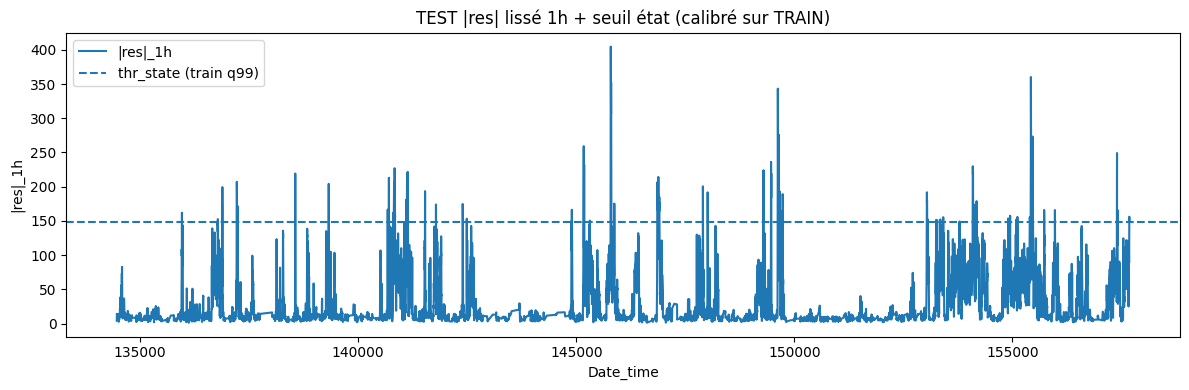

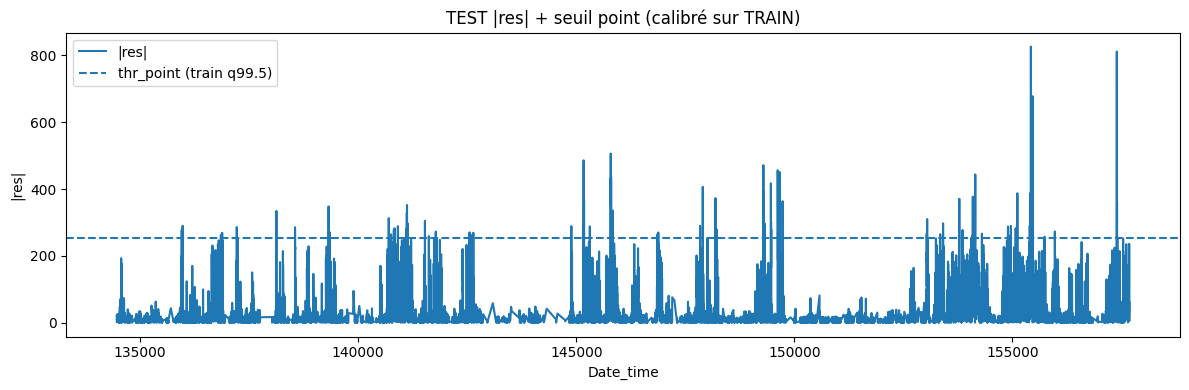

In [ ]:
# =========================================================

# =========================================================

# -----------------------------
# 0) Helper: build residual DF
# -----------------------------
def build_residual_df(X_on, y_on, model, df_wt1, batch_size=4096):
    X_np = X_on.to_numpy(np.float32)
    y_np = y_on.to_numpy(np.float32)

    y_hat = model.predict(X_np, batch_size=batch_size).ravel()
    res = y_np - y_hat
    abs_res = np.abs(res)

    out = pd.DataFrame(
        {
            "Date_time": df_wt1.loc[X_on.index, "Date_time"].values,
            "y": y_np,
            "y_hat": y_hat,
            "res": res,
            "abs_res": abs_res,
        },
        index=X_on.index,
    ).sort_values("Date_time")
    return out


# -----------------------------
# 1) Rolling features (state)
# -----------------------------
def add_rolling_scores(df_res, window_steps=6):
    df_res = df_res.copy()
    df_res["abs_res_smooth"] = df_res["abs_res"].rolling(window_steps, min_periods=1).mean()
    df_res["res_smooth"]     = df_res["res"].rolling(window_steps, min_periods=1).mean()
    return df_res


# -----------------------------
# 2) Calibrate thresholds on TRAIN
# -----------------------------
def calibrate_thresholds(df_train_res, q_point=0.995, q_state=0.99):
    thr_point = np.quantile(df_train_res["abs_res"].values, q_point)
    thr_state = np.quantile(df_train_res["abs_res_smooth"].values, q_state)
    return thr_point, thr_state


# -----------------------------
# 3) Event extraction (persistence)
# -----------------------------
def extract_events(df_res, thr_point, thr_state, min_consecutive=6):
    """
    Event definition:
      - state anomaly: abs_res_smooth > thr_state for >= min_consecutive consecutive samples
      - we also keep info about point spikes: abs_res > thr_point inside event
    """
    df = df_res.copy().reset_index(drop=False).rename(columns={"index": "row_id"})

    is_state = df["abs_res_smooth"] > thr_state
    # (Optionnel) point spikes
    is_point = df["abs_res"] > thr_point

    events = []
    n = len(df)
    i = 0

    while i < n:
        if not is_state.iloc[i]:
            i += 1
            continue

        start = i
        while i < n and is_state.iloc[i]:
            i += 1
        end = i - 1

        length = end - start + 1
        if length < min_consecutive:
            continue

        seg = df.iloc[start : end + 1]

        events.append(
            {
                "start_dt": float(seg["Date_time"].iloc[0]),
                "end_dt": float(seg["Date_time"].iloc[-1]),
                "n_points": int(length),
                "duration_h": float(length * 10 / 60),  # 10 min steps
                "mean_abs_res": float(seg["abs_res"].mean()),
                "max_abs_res": float(seg["abs_res"].max()),
                "mean_res": float(seg["res"].mean()),
                "median_res": float(seg["res"].median()),
                "pct_point_spikes": float(is_point.iloc[start : end + 1].mean() * 100),
                "max_point_spike": float(seg.loc[is_point.iloc[start : end + 1].values, "abs_res"].max())
                                 if (is_point.iloc[start : end + 1].any()) else 0.0,
            }
        )

    return pd.DataFrame(events)


# -----------------------------
# 4) Optional: attach context features (diagnostic)
# -----------------------------
def add_event_context(events_df, X_on, df_wt1, feature_cols, lookback_steps=6):
    """
    Adds mean values of selected features during each event
    and compares to a "reference" window just before the event (lookback).
    """
    if events_df.empty:
        return events_df

    X_tmp = X_on.copy()
    X_tmp["Date_time"] = df_wt1.loc[X_on.index, "Date_time"].values
    X_tmp = X_tmp.sort_values("Date_time")

    out = events_df.copy()

    for col in feature_cols:
        if col not in X_tmp.columns:
            continue

        ev_means = []
        ref_means = []
        deltas = []

        for _, ev in out.iterrows():
            start_dt = ev["start_dt"]
            end_dt = ev["end_dt"]

            seg = X_tmp[(X_tmp["Date_time"] >= start_dt) & (X_tmp["Date_time"] <= end_dt)]
            if seg.empty:
                ev_means.append(np.nan)
                ref_means.append(np.nan)
                deltas.append(np.nan)
                continue

            # reference window: the last 'lookback_steps' points before start_dt
            ref = X_tmp[X_tmp["Date_time"] < start_dt].tail(lookback_steps)

            m_ev = float(seg[col].mean())
            m_ref = float(ref[col].mean()) if len(ref) > 0 else np.nan

            ev_means.append(m_ev)
            ref_means.append(m_ref)
            deltas.append(m_ev - m_ref if np.isfinite(m_ref) else np.nan)

        out[f"{col}_mean_event"] = ev_means
        out[f"{col}_mean_ref"] = ref_means
        out[f"{col}_delta"] = deltas

    return out


# =========================================================
# A) Build residual dataframes
# =========================================================
df_res_train = build_residual_df(X_train_on, y_train_on, model, df_wt1)
df_res_val   = build_residual_df(X_val_on,   y_val_on,   model, df_wt1)
df_res_test  = build_residual_df(X_test_on,  y_test_on,  model, df_wt1)

# 1h smoothing (6 * 10min)
W = 6
df_res_train = add_rolling_scores(df_res_train, window_steps=W)
df_res_val   = add_rolling_scores(df_res_val,   window_steps=W)
df_res_test  = add_rolling_scores(df_res_test,  window_steps=W)

# =========================================================
# B) Calibrate thresholds on TRAIN_ON
# =========================================================
thr_point, thr_state = calibrate_thresholds(df_res_train, q_point=0.995, q_state=0.99)

print("Thresholds (calibrated on TRAIN_ON)")
print(" - thr_point (|res|, q=0.995):", thr_point)
print(" - thr_state (|res|_1h, q=0.99):", thr_state)

# =========================================================
# C) Extract events (VAL/TEST)
# =========================================================
# min_consecutive=6 => >= 1h persistant (6*10min)
events_val  = extract_events(df_res_val,  thr_point, thr_state, min_consecutive=6)
events_test = extract_events(df_res_test, thr_point, thr_state, min_consecutive=6)

print("\nVAL events:", len(events_val))
display(events_val.head(10))

print("\nTEST events:", len(events_test))
display(events_test.head(10))

# =========================================================
# D) Add lightweight diagnostic context (optionnel)
# =========================================================
diag_cols = [c for c in ["Rotor_speed", "Pitch_angle", "power_control_proxy", "Grid_voltage_isnan"] if c in X_test_on.columns]

events_test_diag = add_event_context(events_test, X_test_on, df_wt1, diag_cols, lookback_steps=6)
print("\nTEST events + context:")
display(events_test_diag.head(10))

# =========================================================
# E) Visualize on TEST (scores + thresholds)
# =========================================================
plt.figure(figsize=(12,4))
plt.plot(df_res_test["Date_time"], df_res_test["abs_res_smooth"], label="|res|_1h")
plt.axhline(thr_state, linestyle="--", label="thr_state (train q99)")
plt.title("TEST |res| lissé 1h + seuil état (calibré sur TRAIN)")
plt.xlabel("Date_time")
plt.ylabel("|res|_1h")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(df_res_test["Date_time"], df_res_test["abs_res"], label="|res|")
plt.axhline(thr_point, linestyle="--", label="thr_point (train q99.5)")
plt.title("TEST |res| + seuil point (calibré sur TRAIN)")
plt.xlabel("Date_time")
plt.ylabel("|res|")
plt.legend()
plt.tight_layout()
plt.show()


Dans un pipeline **NBM**, on vérifie si le jeu d’entraînement contient des **états non normaux persistants** (contamination).  
Si des événements longs existent dans TRAIN_ON, le modèle peut les apprendre comme “normaux”, ce qui réduit la sensibilité de la détection sur TEST.  
On applique donc le même détecteur (|résidu| lissé 1h + persistance) sur TRAIN_ON pour mesurer ce risque.


In [61]:

# =========================================================
# Build TRAIN events exactly like TEST/VAL (NBM style)
# Needs (already computed earlier in your notebook):
#  - model (keras)
#  - X_train_on (DataFrame, scaled)
#  - y_train_on (Series)
#  - df_wt1 with Date_time
#  - thr_point, thr_state (calibrated on TRAIN_ON as you did)
# =========================================================

# ---- 1) Predictions + residuals on TRAIN_ON
Xtr = X_train_on.to_numpy(dtype=np.float32)
pred_tr = model.predict(Xtr, batch_size=4096).ravel()

ytr = y_train_on.to_numpy(dtype=np.float32)
res_tr = ytr - pred_tr
abs_res_tr = np.abs(res_tr)

# Align Date_time with TRAIN_ON index
dt_tr = df_wt1.loc[X_train_on.index, "Date_time"].to_numpy(dtype=np.float64)

# ---- 2) 1h smoothing (6 points = 60 min since 10min sampling)
abs_res_tr_smooth_1h = (
    pd.Series(abs_res_tr, index=X_train_on.index)
      .rolling(window=6, min_periods=6)
      .mean()
      .to_numpy()
)

# ---- 3) Flag anomalies by state threshold (ignore first 5 NaNs from rolling)
is_state_anom = abs_res_tr_smooth_1h > thr_state
is_state_anom = np.nan_to_num(is_state_anom, nan=False)

# Optional: point spikes (for pct_point_spikes)
is_point_spike = abs_res_tr > thr_point

# ---- 4) Build contiguous events (consecutive True segments)
events = []
in_evt = False
start_i = None

for i, flag in enumerate(is_state_anom):
    if flag and not in_evt:
        in_evt = True
        start_i = i
    elif (not flag) and in_evt:
        end_i = i - 1
        events.append((start_i, end_i))
        in_evt = False

# if ends with an event
if in_evt:
    events.append((start_i, len(is_state_anom) - 1))

# ---- 5) Summarize events into a DataFrame
rows = []
for (s, e) in events:
    idx_slice = slice(s, e + 1)
    n_points = e - s + 1
    duration_h = n_points * (10/60)  # 10 min per point

    seg_abs = abs_res_tr[idx_slice]
    seg_res = res_tr[idx_slice]
    seg_spikes = is_point_spike[idx_slice]

    rows.append({
        "start_dt": float(dt_tr[s]),
        "end_dt": float(dt_tr[e]),
        "n_points": int(n_points),
        "duration_h": float(duration_h),
        "mean_abs_res": float(np.mean(seg_abs)),
        "max_abs_res": float(np.max(seg_abs)),
        "mean_res": float(np.mean(seg_res)),
        "median_res": float(np.median(seg_res)),
        "pct_point_spikes": float(100.0 * np.mean(seg_spikes)),
    })

events_train = pd.DataFrame(rows).sort_values(["duration_h", "mean_abs_res"], ascending=False).reset_index(drop=True)

print("Nb TRAIN events:", len(events_train))
display(events_train.head(10))

# ---- 6) Direct answer to your question: events >= 3h?
events_3h = events_train[events_train["duration_h"] >= 2.0]
print("Nb TRAIN events >= 3h:", len(events_3h))
display(events_3h.head(20))


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Nb TRAIN events: 166


,start_dt,end_dt,n_points,duration_h,mean_abs_res,max_abs_res,mean_res,median_res,pct_point_spikes
0,2693.0,2735.0,43,7.166667,293.431335,729.079529,292.130585,235.241211,46.511628
1,5135.0,5167.0,33,5.500000,320.138641,584.955139,320.138641,326.644897,63.636364
2,6838.0,6854.0,17,2.833333,181.825058,287.070679,181.825058,180.454224,11.764706
3,47248.0,47263.0,16,2.666667,168.715485,251.756836,168.715485,175.821289,0.000000
4,65321.0,65333.0,13,2.166667,326.968536,568.237915,308.681824,302.784729,61.538462
5,3263.0,3274.0,12,2.000000,259.928925,499.439453,259.928925,300.520020,66.666667
6,46360.0,46371.0,12,2.000000,193.838745,273.641724,193.838745,193.564941,16.666667
7,2747.0,2757.0,11,1.833333,171.800293,420.412476,171.800293,138.105591,18.181818
8,78472.0,78482.0,11,1.833333,168.162476,339.825562,161.320374,184.221924,18.181818
9,5718.0,5728.0,11,1.833333,166.125183,428.740479,166.125183,151.203613,9.090909


Nb TRAIN events >= 3h: 7


,start_dt,end_dt,n_points,duration_h,mean_abs_res,max_abs_res,mean_res,median_res,pct_point_spikes
0,2693.0,2735.0,43,7.166667,293.431335,729.079529,292.130585,235.241211,46.511628
1,5135.0,5167.0,33,5.500000,320.138641,584.955139,320.138641,326.644897,63.636364
2,6838.0,6854.0,17,2.833333,181.825058,287.070679,181.825058,180.454224,11.764706
3,47248.0,47263.0,16,2.666667,168.715485,251.756836,168.715485,175.821289,0.000000
4,65321.0,65333.0,13,2.166667,326.968536,568.237915,308.681824,302.784729,61.538462
5,3263.0,3274.0,12,2.000000,259.928925,499.439453,259.928925,300.520020,66.666667
6,46360.0,46371.0,12,2.000000,193.838745,273.641724,193.838745,193.564941,16.666667


## Étiquetage "métier" des événements TEST (NBM)

Basé sur comparaison Event vs fenêtre de référence juste avant l'event
Hypothèses:
- events_test_simple existe (start_dt, end_dt, ...)
- df_res_test existe (Date_time, y, y_hat, res, abs_res, abs_res_smooth)
- X_test_on existe (features)
- df_wt1 contient Date_time


In [ ]:


def build_test_context_df(X_test_on, df_wt1, df_res_test):
    """Unifie Date_time + quelques features + y/y_hat/res pour analyse par événement."""
    ctx = X_test_on.copy()
    ctx["Date_time"] = df_wt1.loc[X_test_on.index, "Date_time"].values

    # ajouter info résidus (aligné sur index)
    for c in ["y", "y_hat", "res", "abs_res", "abs_res_smooth"]:
        if c in df_res_test.columns:
            ctx[c] = df_res_test.loc[X_test_on.index, c].values

    return ctx.sort_values("Date_time")


CTX = build_test_context_df(X_test_on, df_wt1, df_res_test)

def label_event_business(ctx_event, ctx_ref, thresholds=None):
    """
    Retourne un label métier + des raisons.
    thresholds: dict optionnel pour régler des seuils.
    """
    if thresholds is None:
        thresholds = {
            "min_ref_points": 6,          # 1h de ref
            "low_power_ratio": 0.30,      # y_event < 30% de y_ref => puissance "basse"
            "pitch_high_delta": 5.0,      # +5° vs ref => pitch significativement plus élevé
            "rotor_low_ratio": 0.60,      # rotor_event < 60% rotor_ref => rotor "bas"
            "grid_nan_ratio": 0.30,       # >30% de Grid_voltage_isnan=1 => suspect électrique/mesure
        }

    reasons = []
    label = "UNCLASSIFIED"

    # Guard: pas assez de ref
    if len(ctx_ref) < thresholds["min_ref_points"]:
        return "UNKNOWN_NO_REFERENCE", ["ref_window_too_small"]

    # Stats de base
    y_ev = ctx_event["y"].mean() if "y" in ctx_event else np.nan
    y_rf = ctx_ref["y"].mean()   if "y" in ctx_ref else np.nan
    res_mean = ctx_event["res"].mean() if "res" in ctx_event else np.nan

    # Features (si dispo)
    pitch_ev = ctx_event["Pitch_angle"].mean() if "Pitch_angle" in ctx_event else np.nan
    pitch_rf = ctx_ref["Pitch_angle"].mean()   if "Pitch_angle" in ctx_ref else np.nan

    rotor_ev = ctx_event["Rotor_speed"].mean() if "Rotor_speed" in ctx_event else np.nan
    rotor_rf = ctx_ref["Rotor_speed"].mean()   if "Rotor_speed" in ctx_ref else np.nan

    grid_nan_ev = ctx_event["Grid_voltage_isnan"].mean() if "Grid_voltage_isnan" in ctx_event else 0.0

    # Ratios / deltas
    power_ratio = (y_ev / (y_rf + 1e-6)) if np.isfinite(y_ev) and np.isfinite(y_rf) else np.nan
    pitch_delta = (pitch_ev - pitch_rf) if np.isfinite(pitch_ev) and np.isfinite(pitch_rf) else np.nan
    rotor_ratio = (rotor_ev / (rotor_rf + 1e-6)) if np.isfinite(rotor_ev) and np.isfinite(rotor_rf) else np.nan

    # --- Règles métier simples ---
    # 1) Mesure / électrique suspect
    if grid_nan_ev > thresholds["grid_nan_ratio"]:
        label = "ELECTRICAL_OR_MEASUREMENT_ISSUE"
        reasons.append(f"Grid_voltage_isnan_mean={grid_nan_ev:.2f}")

    # 2) Sous-performance (normal attendu > réel) + puissance basse
    # -> typique curtailment / limitation / arrêt partiel
    # Indices: mean_res négatif + puissance basse, pitch plus élevé OU rotor plus bas
    if np.isfinite(res_mean) and res_mean < 0 and np.isfinite(power_ratio) and power_ratio < thresholds["low_power_ratio"]:
        if np.isfinite(pitch_delta) and pitch_delta > thresholds["pitch_high_delta"]:
            label = "CURTAILMENT_OR_PITCH_LIMITATION"
            reasons += [f"res_mean={res_mean:.1f}", f"power_ratio={power_ratio:.2f}", f"pitch_delta={pitch_delta:.1f}"]
        elif np.isfinite(rotor_ratio) and rotor_ratio < thresholds["rotor_low_ratio"]:
            label = "LOW_ROTOR_SPEED_OR_SHUTDOWN"
            reasons += [f"res_mean={res_mean:.1f}", f"power_ratio={power_ratio:.2f}", f"rotor_ratio={rotor_ratio:.2f}"]
        else:
            label = "UNDERPERFORMANCE_UNSPECIFIED"
            reasons += [f"res_mean={res_mean:.1f}", f"power_ratio={power_ratio:.2f}"]

    # 3) Sur-performance / shift (réel > attendu)
    # -> souvent régime rare, biais modèle, changement conditions, recalibration
    if label == "UNCLASSIFIED" and np.isfinite(res_mean) and res_mean > 0:
        label = "OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT"
        reasons.append(f"res_mean={res_mean:.1f}")

    # 4) Si rien n’a matché
    if label == "UNCLASSIFIED":
        reasons.append("no_rule_matched")

    return label, reasons


# ---------------------------------------------------------
# Appliquer aux événements TEST
# ---------------------------------------------------------
LOOKBACK_POINTS = 6  # 1h de référence juste avant l'événement (6*10min)

rows = []
for _, ev in events_test.iterrows():
    start_dt = ev["start_dt"]
    end_dt   = ev["end_dt"]

    ctx_event = CTX[(CTX["Date_time"] >= start_dt) & (CTX["Date_time"] <= end_dt)]
    ctx_ref   = CTX[CTX["Date_time"] < start_dt].tail(LOOKBACK_POINTS)

    label, reasons = label_event_business(ctx_event, ctx_ref)

    rows.append({
        **ev.to_dict(),
        "business_label": label,
        "reasons": "; ".join(reasons),
        # mini contexte numérique utile
        "y_mean_event": float(ctx_event["y"].mean()) if "y" in ctx_event and len(ctx_event) else np.nan,
        "y_mean_ref":   float(ctx_ref["y"].mean())   if "y" in ctx_ref and len(ctx_ref) else np.nan,
        "Pitch_angle_mean_event": float(ctx_event["Pitch_angle"].mean()) if "Pitch_angle" in ctx_event and len(ctx_event) else np.nan,
        "Pitch_angle_mean_ref":   float(ctx_ref["Pitch_angle"].mean())   if "Pitch_angle" in ctx_ref and len(ctx_ref) else np.nan,
        "Rotor_speed_mean_event": float(ctx_event["Rotor_speed"].mean()) if "Rotor_speed" in ctx_event and len(ctx_event) else np.nan,
        "Rotor_speed_mean_ref":   float(ctx_ref["Rotor_speed"].mean())   if "Rotor_speed" in ctx_ref and len(ctx_ref) else np.nan,
        "Grid_voltage_isnan_mean_event": float(ctx_event["Grid_voltage_isnan"].mean()) if "Grid_voltage_isnan" in ctx_event and len(ctx_event) else np.nan,
    })

events_test_labeled = pd.DataFrame(rows).sort_values(
    ["duration_h", "mean_abs_res"], ascending=False
).reset_index(drop=True)

display(events_test_labeled.head(30))

# Petit résumé par type
print("\nCounts by business_label:")
display(events_test_labeled["business_label"].value_counts())


,start_dt,end_dt,n_points,duration_h,mean_abs_res,max_abs_res,mean_res,median_res,pct_point_spikes,max_point_spike,business_label,reasons,y_mean_event,y_mean_ref,Pitch_angle_mean_event,Pitch_angle_mean_ref,Rotor_speed_mean_event,Rotor_speed_mean_ref,Grid_voltage_isnan_mean_event
0,149617.0,149648.0,32.0,5.333333,232.535522,456.082153,227.560913,217.852112,40.625000,456.082153,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=227.6,1573.907471,876.244446,5.343750,0.000000,0.691490,0.532744,0.0
1,146855.0,146875.0,21.0,3.500000,171.804733,257.140015,171.804733,177.452881,4.761905,257.140015,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=171.8,1607.988525,1117.628540,3.714286,0.000000,0.703152,0.681401,0.0
2,145786.0,145803.0,18.0,3.000000,287.517609,506.049683,281.586884,333.869965,61.111111,506.049683,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=281.6,1269.407715,1248.070190,10.222222,19.166667,0.668849,0.659463,0.0
3,146891.0,146906.0,16.0,2.666667,167.408722,236.125366,167.408722,164.001282,0.000000,0.000000,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=167.4,1638.824219,1414.589966,25.625000,0.000000,0.703217,0.703340,0.0
4,149282.0,149294.0,13.0,2.166667,178.728333,471.233276,152.948975,143.142761,30.769231,471.233276,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=152.9,1219.631104,928.008728,0.846154,0.666667,0.670696,0.585134,0.0
5,155453.0,155465.0,12.0,2.000000,183.795715,677.727905,-183.795715,-142.506836,16.666667,677.727905,UNCLASSIFIED,no_rule_matched,2115.263428,2203.310059,1457.916667,1338.333333,0.633431,0.691224,0.0
6,155416.0,155427.0,11.0,1.833333,255.505325,825.862427,-3.997104,47.844971,36.363636,825.862427,UNCLASSIFIED,no_rule_matched,1949.154175,1916.751099,2204.727264,2082.166677,0.428291,0.422069,0.0
7,154087.0,154097.0,11.0,1.833333,197.344147,376.997803,193.056335,186.370972,36.363636,376.997803,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=193.1,1645.792969,1537.505859,123.909091,79.166667,0.695124,0.698755,0.0
8,153035.0,153045.0,11.0,1.833333,166.676254,310.246460,166.676254,176.389771,9.090909,310.246460,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=166.7,1438.982056,1044.595825,-0.636364,0.000000,0.702982,0.681401,0.0
9,145163.0,145172.0,10.0,1.666667,195.642609,486.043335,195.642609,163.553284,30.000000,486.043335,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=195.6,1370.269897,1094.024292,0.100000,0.000000,0.703340,0.702685,0.0



Counts by business_label:


business_label
OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT    19
UNCLASSIFIED                              3
Name: count, dtype: int64

On détecte **166 événements** au total mais seulement **2 événements ≥ 3h**.  
➡️ Les anomalies persistantes sont rares dans TRAIN_ON, donc **on ne purge pas le train** et on continue avec la détection/interprétation sur VAL/TEST.


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Residuals summary
TRAIN: mean 9.903124 std 52.702644 MAE 28.987911
VAL  : mean 8.286766 std 58.677288 MAE 30.22466
TEST : mean 20.344275 std 58.949562 MAE 33.427822


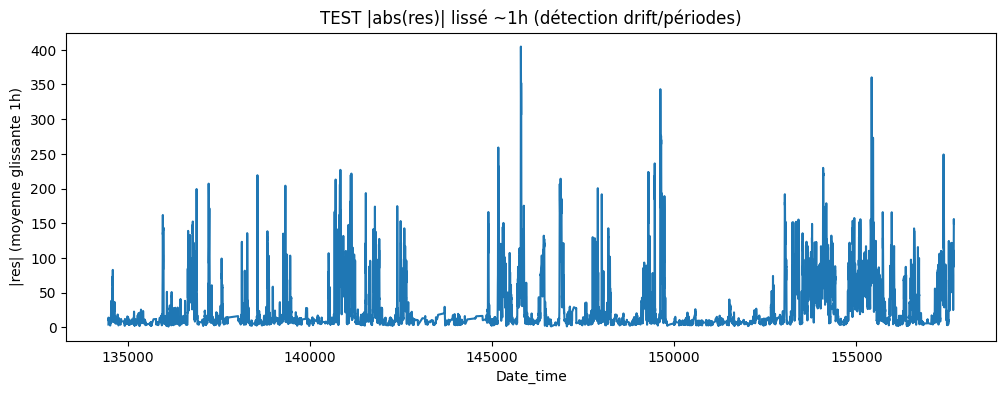

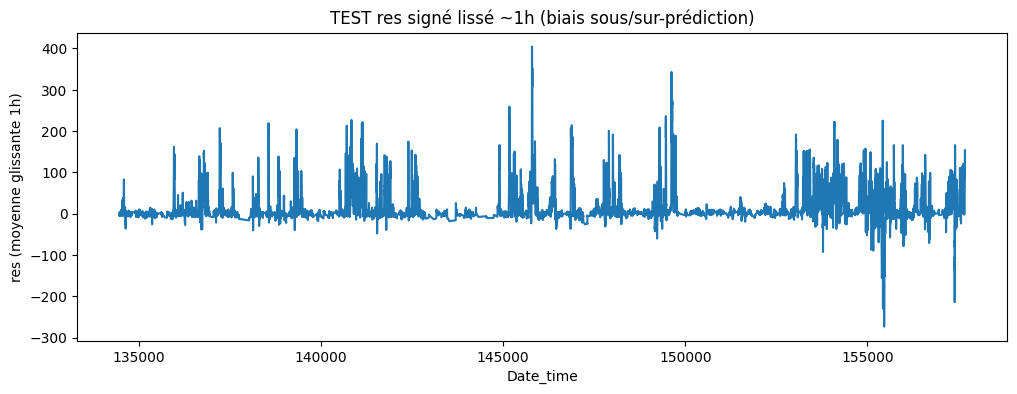

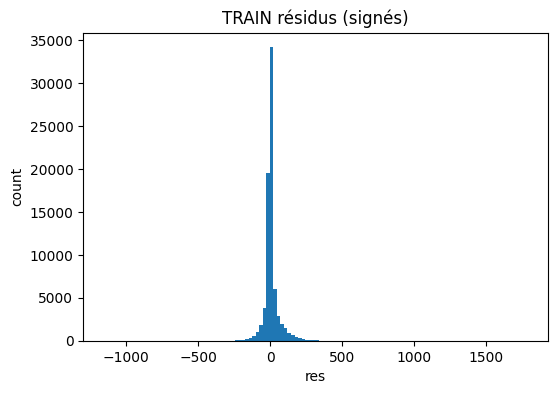

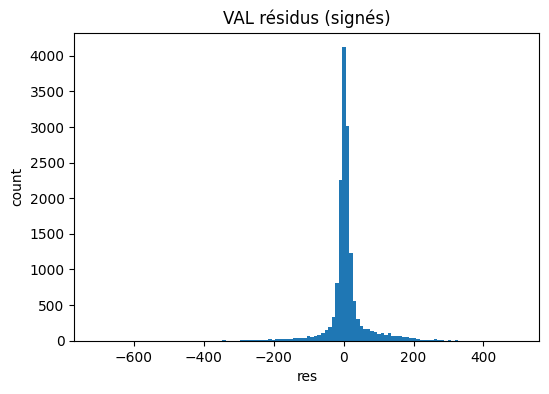

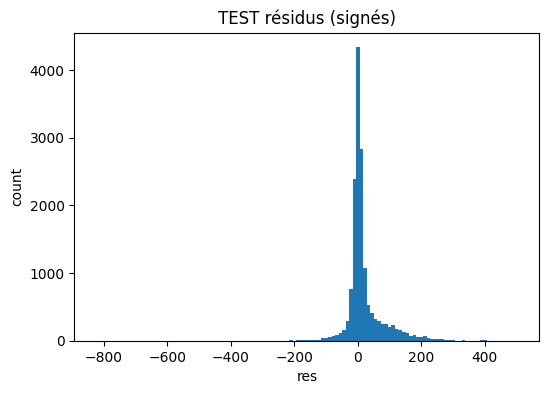

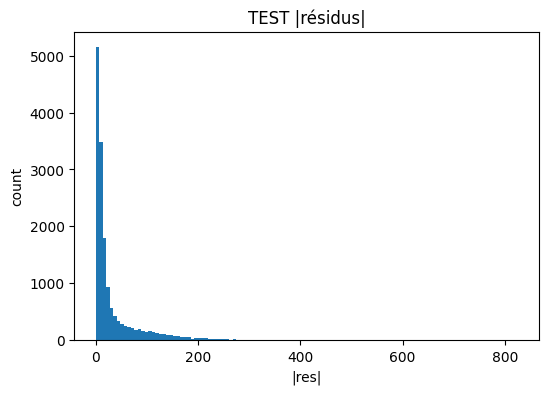

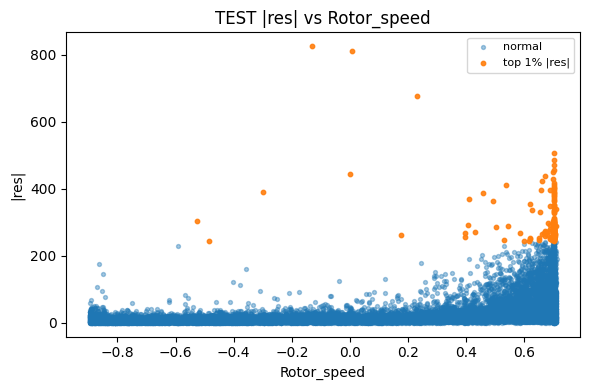

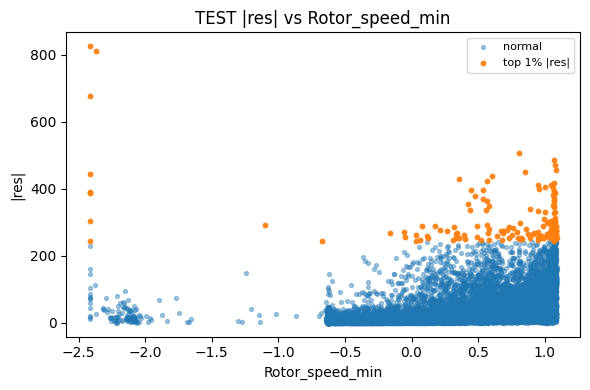

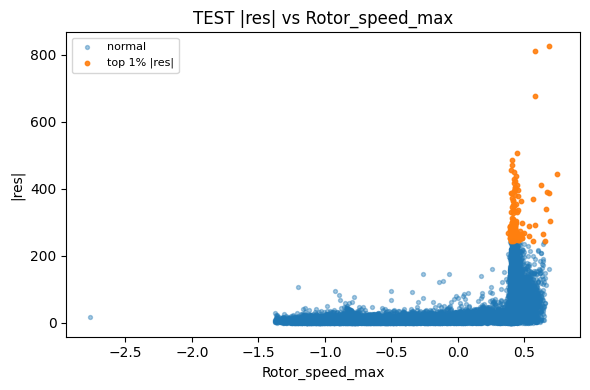

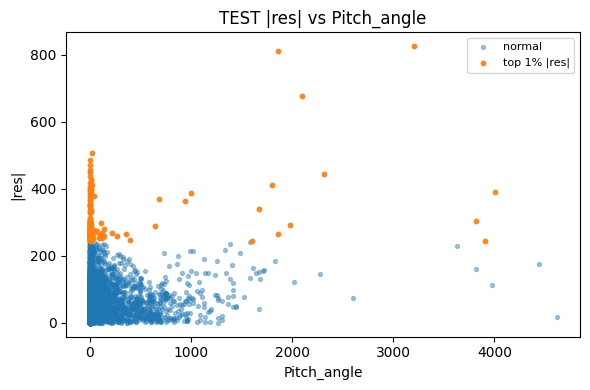

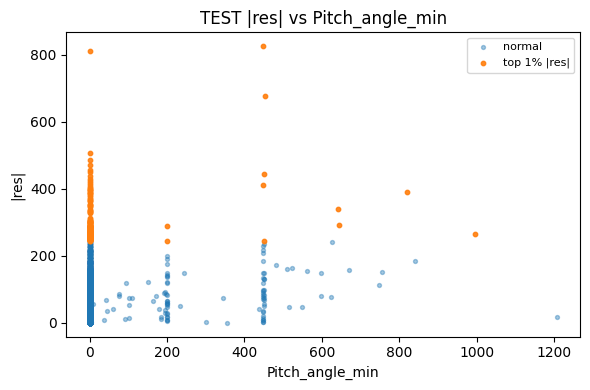

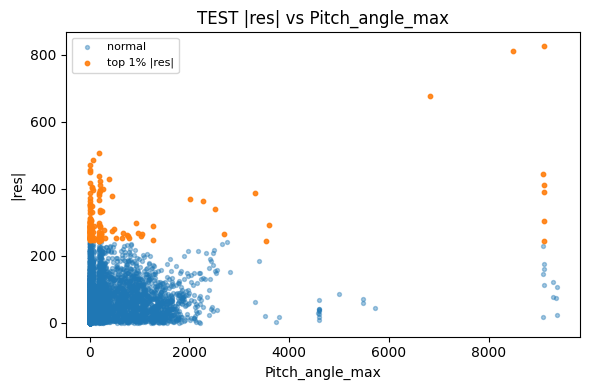

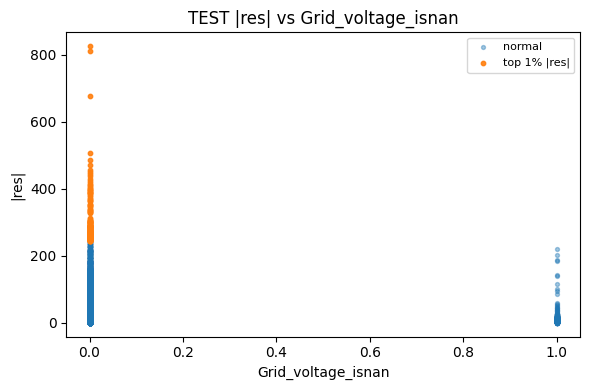

Top erreurs TEST (aperçu):
        Date_time           y        y_hat         res     abs_res
152430   155422.0  1192.36800  2018.230469 -825.862427  825.862427
154400   157392.0  1271.82100  2083.038818 -811.217773  811.217773
152468   155460.0  1464.12311  2141.851074 -677.727905  677.727905
142803   145789.0  1639.26500  1133.215332  506.049683  506.049683
142181   145167.0  1714.35100  1228.307617  486.043335  486.043335
146297   149289.0  1712.00800  1240.774780  471.233276  471.233276
146625   149617.0  1626.49400  1170.411865  456.082153  456.082153
146669   149661.0  1371.84400   921.004517  450.839478  450.839478
151155   154147.0  1311.71800  1755.244019 -443.526001  443.526001
142811   145797.0  1259.47900   822.288513  437.190491  437.190491
MAE par déciles de y (TEST):
y_bin
(1.4520000000000002, 102.26]      8.580917
(102.26, 147.59]                  7.272581
(147.59, 204.512]                 7.611518
(204.512, 282.815]                8.994643
(282.815, 391.997]           

C:\Users\houss\AppData\Local\Temp\ipykernel_21228\4276495577.py:126: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mae_by_bin = df_q.groupby("y_bin")["abs_res"].mean().sort_index()


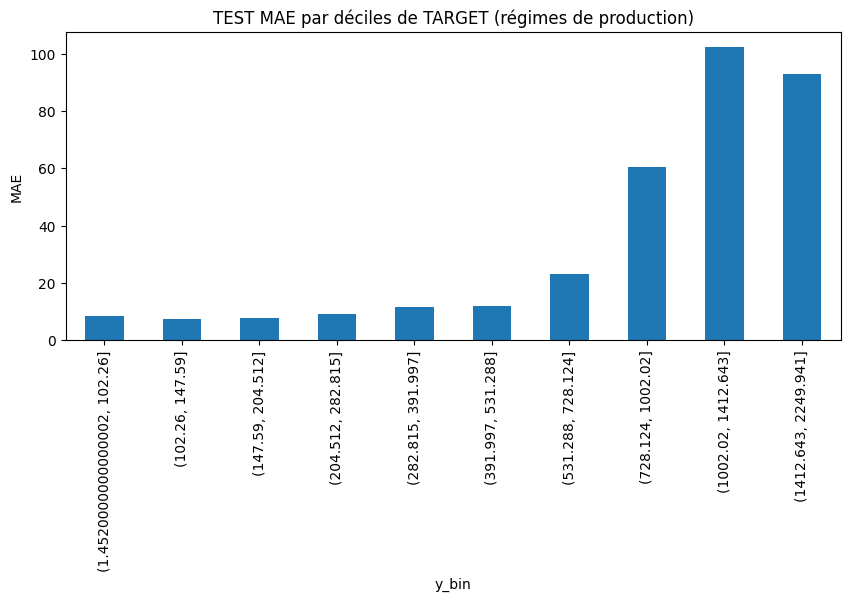

In [63]:
# =========================
# 0) Prédictions + résidus
# =========================
pred_train = model.predict(X_train_on.to_numpy(np.float32), batch_size=4096).ravel()
pred_val   = model.predict(X_val_on.to_numpy(np.float32),   batch_size=4096).ravel()
pred_test  = model.predict(X_test_on.to_numpy(np.float32),  batch_size=4096).ravel()

res_train = y_train_on.to_numpy(np.float32) - pred_train
res_val   = y_val_on.to_numpy(np.float32)   - pred_val
res_test  = y_test_on.to_numpy(np.float32)  - pred_test

abs_res_train = np.abs(res_train)
abs_res_val   = np.abs(res_val)
abs_res_test  = np.abs(res_test)

print("Residuals summary")
print("TRAIN: mean", res_train.mean(), "std", res_train.std(), "MAE", abs_res_train.mean())
print("VAL  : mean", res_val.mean(),   "std", res_val.std(),   "MAE", abs_res_val.mean())
print("TEST : mean", res_test.mean(),  "std", res_test.std(),  "MAE", abs_res_test.mean())

# =========================
# 1) Résidus vs temps
#    (drift / périodes)
# =========================
def make_residual_df(X_on, y_on, pred, res, abs_res, df_wt1):
    out = pd.DataFrame({
        "y": y_on.values,
        "y_hat": pred,
        "res": res,
        "abs_res": abs_res,
        "Date_time": df_wt1.loc[X_on.index, "Date_time"].values
    }, index=X_on.index).sort_values("Date_time")
    return out

df_res_train = make_residual_df(X_train_on, y_train_on, pred_train, res_train, abs_res_train, df_wt1)
df_res_val   = make_residual_df(X_val_on,   y_val_on,   pred_val,   res_val,   abs_res_val,   df_wt1)
df_res_test  = make_residual_df(X_test_on,  y_test_on,  pred_test,  res_test,  abs_res_test,  df_wt1)

# Lissage (fenêtre ~ 1h = 6 pas de 10 min)
W = 6
for df_ in [df_res_train, df_res_val, df_res_test]:
    df_["abs_res_smooth_1h"] = df_["abs_res"].rolling(W, min_periods=1).mean()
    df_["res_smooth_1h"]     = df_["res"].rolling(W, min_periods=1).mean()

plt.figure(figsize=(12,4))
plt.plot(df_res_test["Date_time"], df_res_test["abs_res_smooth_1h"])
plt.title("TEST |abs(res)| lissé ~1h (détection drift/périodes)")
plt.xlabel("Date_time")
plt.ylabel("|res| (moyenne glissante 1h)")
plt.show()

plt.figure(figsize=(12,4))
plt.plot(df_res_test["Date_time"], df_res_test["res_smooth_1h"])
plt.title("TEST res signé lissé ~1h (biais sous/sur-prédiction)")
plt.xlabel("Date_time")
plt.ylabel("res (moyenne glissante 1h)")
plt.show()

# =========================
# 2) Distribution des résidus
#    (queue, asymétrie)
# =========================
def plot_hist(res, title):
    plt.figure(figsize=(6,4))
    plt.hist(res, bins=120)
    plt.title(title)
    plt.xlabel("res")
    plt.ylabel("count")
    plt.show()

plot_hist(res_train, "TRAIN résidus (signés)")
plot_hist(res_val,   "VAL résidus (signés)")
plot_hist(res_test,  "TEST résidus (signés)")

plt.figure(figsize=(6,4))
plt.hist(abs_res_test, bins=120)
plt.title("TEST |résidus|")
plt.xlabel("|res|")
plt.ylabel("count")
plt.show()

# =========================
# 3) Résidus vs features clés
#    (si dépendance -> manque un régime)
# =========================
features_to_check = [c for c in [
    "Rotor_speed", "Rotor_speed_min", "Rotor_speed_max",
    "Pitch_angle", "Pitch_angle_min", "Pitch_angle_max",
    "Grid_voltage_isnan",
    "power_control_proxy",
] if c in X_test_on.columns]

thr = np.quantile(abs_res_test, 0.99)

for col in features_to_check:
    plt.figure(figsize=(6,4))
    normal = abs_res_test < thr
    plt.scatter(X_test_on.loc[normal, col].values, abs_res_test[normal], s=8, alpha=0.4, label="normal")
    plt.scatter(X_test_on.loc[~normal, col].values, abs_res_test[~normal], s=10, alpha=0.9, label="top 1% |res|")
    plt.legend(fontsize=8)
    plt.title(f"TEST |res| vs {col}")
    plt.xlabel(col)
    plt.ylabel("|res|")
    plt.tight_layout()
    plt.show()


# =========================
# 4) Top erreurs (pour inspection)
#    (on ne supprime pas encore ici)
# =========================
top_k = 50
idx_top = df_res_test["abs_res"].sort_values(ascending=False).head(top_k).index

print("Top erreurs TEST (aperçu):")
display_cols = ["Date_time", "y", "y_hat", "res", "abs_res"]
print(df_res_test.loc[idx_top, display_cols].sort_values("abs_res", ascending=False).head(10))

# =========================
# 5) Vérif "effet de masse" :
#    MAE par quantiles de puissance (régimes)
# =========================
df_q = df_res_test.copy()
df_q["y_bin"] = pd.qcut(df_q["y"], q=10, duplicates="drop")

mae_by_bin = df_q.groupby("y_bin")["abs_res"].mean().sort_index()
print("MAE par déciles de y (TEST):")
print(mae_by_bin)

plt.figure(figsize=(10,4))
mae_by_bin.plot(kind="bar")
plt.title("TEST MAE par déciles de TARGET (régimes de production)")
plt.ylabel("MAE")
plt.show()



Après avoir détecté des **événements anormaux** via le NBM (seuil sur `|résidu|` lissé + persistance), on veut donner une **interprétation exploitable** sans labels ni experts ENGIE.  
L’idée est de comparer, pour chaque événement, les statistiques **pendant l’événement** à une petite fenêtre **de référence juste avant** (ex: 1h).  
On applique ensuite des règles simples basées sur le sens physique :

- `mean_res < 0` (réel < attendu) → **sous-performance** (perte de production)
  - si `Pitch_angle` augmente fortement → **curtailment / limitation par pitch**
  - si `Rotor_speed` chute fortement → **ralentissement / arrêt**
- forte présence de `Grid_voltage_isnan` → **problème électrique / capteur / indisponibilité mesure**
- `mean_res > 0` (réel > attendu) → **régime rare / distribution shift / biais modèle** (à investiguer)

Cette approche transforme une alerte brute (“gros résidu”) en une alerte interprétable (“curtailment probable”, “arrêt probable”, “problème mesure probable”).


In [64]:
# =========================================================
# Étiquetage "métier" des événements TEST (NBM)
# Basé sur comparaison Event vs fenêtre de référence juste avant l'event
# Hypothèses:
# - events_test_simple existe (start_dt, end_dt, ...)
# - df_res_test existe (Date_time, y, y_hat, res, abs_res, abs_res_smooth)
# - X_test_on existe (features)
# - df_wt1 contient Date_time
# =========================================================

def build_test_context_df(X_test_on, df_wt1, df_res_test):
    """Unifie Date_time + quelques features + y/y_hat/res pour analyse par événement."""
    ctx = X_test_on.copy()
    ctx["Date_time"] = df_wt1.loc[X_test_on.index, "Date_time"].values

    # ajouter info résidus (aligné sur index)
    for c in ["y", "y_hat", "res", "abs_res", "abs_res_smooth"]:
        if c in df_res_test.columns:
            ctx[c] = df_res_test.loc[X_test_on.index, c].values

    return ctx.sort_values("Date_time")


CTX = build_test_context_df(X_test_on, df_wt1, df_res_test)

def label_event_business(ctx_event, ctx_ref, thresholds=None):
    """
    Retourne un label métier + des raisons.
    thresholds: dict optionnel pour régler des seuils.
    """
    if thresholds is None:
        thresholds = {
            "min_ref_points": 6,          # 1h de ref
            "low_power_ratio": 0.30,      # y_event < 30% de y_ref => puissance "basse"
            "pitch_high_delta": 5.0,      # +5° vs ref => pitch significativement plus élevé
            "rotor_low_ratio": 0.60,      # rotor_event < 60% rotor_ref => rotor "bas"
            "grid_nan_ratio": 0.30,       # >30% de Grid_voltage_isnan=1 => suspect électrique/mesure
        }

    reasons = []
    label = "UNCLASSIFIED"

    # Guard: pas assez de ref
    if len(ctx_ref) < thresholds["min_ref_points"]:
        return "UNKNOWN_NO_REFERENCE", ["ref_window_too_small"]

    # Stats de base
    y_ev = ctx_event["y"].mean() if "y" in ctx_event else np.nan
    y_rf = ctx_ref["y"].mean()   if "y" in ctx_ref else np.nan
    res_mean = ctx_event["res"].mean() if "res" in ctx_event else np.nan

    # Features (si dispo)
    pitch_ev = ctx_event["Pitch_angle"].mean() if "Pitch_angle" in ctx_event else np.nan
    pitch_rf = ctx_ref["Pitch_angle"].mean()   if "Pitch_angle" in ctx_ref else np.nan

    rotor_ev = ctx_event["Rotor_speed"].mean() if "Rotor_speed" in ctx_event else np.nan
    rotor_rf = ctx_ref["Rotor_speed"].mean()   if "Rotor_speed" in ctx_ref else np.nan

    grid_nan_ev = ctx_event["Grid_voltage_isnan"].mean() if "Grid_voltage_isnan" in ctx_event else 0.0

    # Ratios / deltas
    power_ratio = (y_ev / (y_rf + 1e-6)) if np.isfinite(y_ev) and np.isfinite(y_rf) else np.nan
    pitch_delta = (pitch_ev - pitch_rf) if np.isfinite(pitch_ev) and np.isfinite(pitch_rf) else np.nan
    rotor_ratio = (rotor_ev / (rotor_rf + 1e-6)) if np.isfinite(rotor_ev) and np.isfinite(rotor_rf) else np.nan

    # --- Règles métier simples ---
    # 1) Mesure / électrique suspect
    if grid_nan_ev > thresholds["grid_nan_ratio"]:
        label = "ELECTRICAL_OR_MEASUREMENT_ISSUE"
        reasons.append(f"Grid_voltage_isnan_mean={grid_nan_ev:.2f}")

    # 2) Sous-performance (normal attendu > réel) + puissance basse
    # -> typique curtailment / limitation / arrêt partiel
    # Indices: mean_res négatif + puissance basse, pitch plus élevé OU rotor plus bas
    if np.isfinite(res_mean) and res_mean < 0 and np.isfinite(power_ratio) and power_ratio < thresholds["low_power_ratio"]:
        if np.isfinite(pitch_delta) and pitch_delta > thresholds["pitch_high_delta"]:
            label = "CURTAILMENT_OR_PITCH_LIMITATION"
            reasons += [f"res_mean={res_mean:.1f}", f"power_ratio={power_ratio:.2f}", f"pitch_delta={pitch_delta:.1f}"]
        elif np.isfinite(rotor_ratio) and rotor_ratio < thresholds["rotor_low_ratio"]:
            label = "LOW_ROTOR_SPEED_OR_SHUTDOWN"
            reasons += [f"res_mean={res_mean:.1f}", f"power_ratio={power_ratio:.2f}", f"rotor_ratio={rotor_ratio:.2f}"]
        else:
            label = "UNDERPERFORMANCE_UNSPECIFIED"
            reasons += [f"res_mean={res_mean:.1f}", f"power_ratio={power_ratio:.2f}"]

    # 3) Sur-performance / shift (réel > attendu)
    # -> souvent régime rare, biais modèle, changement conditions, recalibration
    if label == "UNCLASSIFIED" and np.isfinite(res_mean) and res_mean > 0:
        label = "OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT"
        reasons.append(f"res_mean={res_mean:.1f}")

    # 4) Si rien n’a matché
    if label == "UNCLASSIFIED":
        reasons.append("no_rule_matched")

    return label, reasons


# ---------------------------------------------------------
# Appliquer aux événements TEST
# ---------------------------------------------------------
LOOKBACK_POINTS = 6  # 1h de référence juste avant l'événement (6*10min)

rows = []
for _, ev in events_test.iterrows():
    start_dt = ev["start_dt"]
    end_dt   = ev["end_dt"]

    ctx_event = CTX[(CTX["Date_time"] >= start_dt) & (CTX["Date_time"] <= end_dt)]
    ctx_ref   = CTX[CTX["Date_time"] < start_dt].tail(LOOKBACK_POINTS)

    label, reasons = label_event_business(ctx_event, ctx_ref)

    rows.append({
        **ev.to_dict(),
        "business_label": label,
        "reasons": "; ".join(reasons),
        # mini contexte numérique utile
        "y_mean_event": float(ctx_event["y"].mean()) if "y" in ctx_event and len(ctx_event) else np.nan,
        "y_mean_ref":   float(ctx_ref["y"].mean())   if "y" in ctx_ref and len(ctx_ref) else np.nan,
        "Pitch_angle_mean_event": float(ctx_event["Pitch_angle"].mean()) if "Pitch_angle" in ctx_event and len(ctx_event) else np.nan,
        "Pitch_angle_mean_ref":   float(ctx_ref["Pitch_angle"].mean())   if "Pitch_angle" in ctx_ref and len(ctx_ref) else np.nan,
        "Rotor_speed_mean_event": float(ctx_event["Rotor_speed"].mean()) if "Rotor_speed" in ctx_event and len(ctx_event) else np.nan,
        "Rotor_speed_mean_ref":   float(ctx_ref["Rotor_speed"].mean())   if "Rotor_speed" in ctx_ref and len(ctx_ref) else np.nan,
        "Grid_voltage_isnan_mean_event": float(ctx_event["Grid_voltage_isnan"].mean()) if "Grid_voltage_isnan" in ctx_event and len(ctx_event) else np.nan,
    })

events_test_labeled = pd.DataFrame(rows).sort_values(
    ["duration_h", "mean_abs_res"], ascending=False
).reset_index(drop=True)

display(events_test_labeled.head(30))

# Petit résumé par type
print("\nCounts by business_label:")
display(events_test_labeled["business_label"].value_counts())

,start_dt,end_dt,n_points,duration_h,mean_abs_res,max_abs_res,mean_res,median_res,pct_point_spikes,max_point_spike,business_label,reasons,y_mean_event,y_mean_ref,Pitch_angle_mean_event,Pitch_angle_mean_ref,Rotor_speed_mean_event,Rotor_speed_mean_ref,Grid_voltage_isnan_mean_event
0,149617.0,149648.0,32.0,5.333333,232.535522,456.082153,227.560913,217.852112,40.625000,456.082153,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=227.6,1573.907452,876.244493,5.343750,0.000000,0.691490,0.532744,0.0
1,146855.0,146875.0,21.0,3.500000,171.804733,257.140015,171.804733,177.452881,4.761905,257.140015,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=171.8,1607.988349,1117.628498,3.714286,0.000000,0.703152,0.681401,0.0
2,145786.0,145803.0,18.0,3.000000,287.517609,506.049683,281.586884,333.869965,61.111111,506.049683,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=281.6,1269.407716,1248.070169,10.222222,19.166667,0.668849,0.659463,0.0
3,146891.0,146906.0,16.0,2.666667,167.408722,236.125366,167.408722,164.001282,0.000000,0.000000,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=167.4,1638.824299,1414.590000,25.625000,0.000000,0.703217,0.703340,0.0
4,149282.0,149294.0,13.0,2.166667,178.728333,471.233276,152.948975,143.142761,30.769231,471.233276,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=152.9,1219.631077,928.008669,0.846154,0.666667,0.670696,0.585134,0.0
5,155453.0,155465.0,12.0,2.000000,183.795715,677.727905,-183.795715,-142.506836,16.666667,677.727905,UNCLASSIFIED,no_rule_matched,2115.263426,2203.310167,1457.916667,1338.333333,0.633431,0.691224,0.0
6,155416.0,155427.0,11.0,1.833333,255.505325,825.862427,-3.997104,47.844971,36.363636,825.862427,UNCLASSIFIED,no_rule_matched,1949.154030,1916.750996,2204.727264,2082.166677,0.428291,0.422069,0.0
7,154087.0,154097.0,11.0,1.833333,197.344147,376.997803,193.056335,186.370972,36.363636,376.997803,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=193.1,1645.793010,1537.505833,123.909091,79.166667,0.695124,0.698755,0.0
8,153035.0,153045.0,11.0,1.833333,166.676254,310.246460,166.676254,176.389771,9.090909,310.246460,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=166.7,1438.982000,1044.595806,-0.636364,0.000000,0.702982,0.681401,0.0
9,145163.0,145172.0,10.0,1.666667,195.642609,486.043335,195.642609,163.553284,30.000000,486.043335,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=195.6,1370.269889,1094.024352,0.100000,0.000000,0.703340,0.702685,0.0



Counts by business_label:


business_label
OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT    19
UNCLASSIFIED                              3
Name: count, dtype: int64

# Sauvegarde du modèle DNN (pickle) et pipeline prédiction + détection d'anomalies

**Pas de réentraînement** : on sauvegarde le modèle DNN déjà entraîné avec pickle.  
Une petite classe fait le **prétraitement**, utilise le modèle pour la **prédiction**, et la **détection d'anomalies** (NBM + étiquetage).

In [65]:
# ============== 1) SAUVEGARDE DU MODÈLE (pas de réentraînement) ==============
# À exécuter une fois après avoir entraîné le modèle (variables model, scaler, etc. doivent exister)

def save_wind_turbine_pipeline(filepath, model, scaler, median_values, X_train_on, thr_point, thr_state, mac_code='WT1'):
    """Sauvegarde le DNN et tous les artefacts pour prédiction + détection d'anomalies."""
    filepath = Path(filepath)
    binary_cols = ['Grid_voltage_isnan']
    scale_cols = [c for c in X_train_on.columns if c not in binary_cols]
    feature_cols = list(X_train_on.columns)
    
    model_path = filepath.with_suffix('.keras')
    model.save(str(model_path))
    
    drop_cols = [
        "Nacelle_angle_c", "Absolute_wind_direction_c", "Absolute_wind_direction",
        "Generator_speed", "Generator_speed_min", "Generator_speed_max", "Generator_speed_std",
        "Generator_speed_others_med", "Generator_speed_idio",
        "Generator_converter_speed", "Generator_converter_speed_min", "Generator_converter_speed_max",
        "Generator_converter_speed_std", "Generator_converter_speed_others_med", "Generator_converter_speed_idio"
    ]
    signals_for_fleet = [
        "Rotor_speed", "Generator_speed", "Generator_converter_speed",
        "Gearbox_oil_sump_temperature", "Generator_stator_temperature",
        "Nacelle_temperature", "Outdoor_temperature",
    ]
    
    save_dict = {
        'mac_code': mac_code,
        'scaler': scaler,
        'median_values': median_values,
        'feature_cols': feature_cols,
        'scale_cols': scale_cols,
        'binary_cols': binary_cols,
        'drop_cols': drop_cols,
        'signals_for_fleet': signals_for_fleet,
        'max_cf_gap': 12,
        'model_path': str(model_path),
        'thr_point': thr_point,
        'thr_state': thr_state,
        'GATE_COL': 'Rotor_speed',
        'THR_RS': 9.0,
    }
    with open(filepath, 'wb') as f:
        pickle.dump(save_dict, f)
    print(f"Sauvegardé: {filepath} et {model_path}")


# ============== 2) CLASSE : prétraitement + prédiction + détection d'anomalies ==============

class WindTurbinePipeline:
    """Prétraitement, prédiction et détection d'anomalies (NBM + étiquetage). Pas d'entraînement."""
    
    def __init__(self, mac_code='WT1'):
        self.mac_code = mac_code
        self.scaler = self.model = None
        self.median_values = {}
        self.feature_cols = self.scale_cols = self.binary_cols = None
        self.drop_cols = self.signals_for_fleet = None
        self.max_cf_gap = 12
        self.thr_point = self.thr_state = None
        self.GATE_COL = 'Rotor_speed'
        self.THR_RS = 9.0
    
    def _add_physical_features(self, X):
        X = X.copy()
        if 'Generator_speed' in X.columns and 'Rotor_speed' in X.columns:
            X["speed_ratio"] = X["Generator_speed"] / (X["Rotor_speed"] + 1e-6)
        if 'Generator_bearing_1_temperature' in X.columns and 'Generator_bearing_2_temperature' in X.columns:
            X["bearing_temp_diff"] = X["Generator_bearing_1_temperature"] - X["Generator_bearing_2_temperature"]
        if 'Rotor_speed_std' in X.columns and 'Rotor_speed' in X.columns:
            X["Rotor_speed_cv"] = X["Rotor_speed_std"] / (X["Rotor_speed"] + 1e-6)
        return X

    def _add_fleet_median_features(self, X, dt, df_all):
        X_out = X.copy()
        others = df_all[df_all["MAC_CODE"] != self.mac_code][["Date_time", "MAC_CODE"] + self.signals_for_fleet].copy()
        med = others.groupby("Date_time")[self.signals_for_fleet].median()
        cnt = others.groupby("Date_time")[self.signals_for_fleet].count()
        med = med.where(cnt == len(df_all["MAC_CODE"].unique()) - 1)
        med_cols = med.add_suffix("_others_med")
        tmp = pd.DataFrame({"Date_time": dt.values}, index=X_out.index).join(med_cols, on="Date_time")
        X_out = X_out.join(tmp.drop(columns=["Date_time"]))
        for s in self.signals_for_fleet:
            if s in X_out.columns and s + "_others_med" in X_out.columns:
                X_out[s + "_idio"] = X_out[s] - X_out[s + "_others_med"]
        return X_out

    def _add_grid_flag(self, X):
        X = X.copy()
        grid_cols = [c for c in X.columns if c.startswith("Grid_voltage") and not c.endswith("_isnan")]
        X["Grid_voltage_isnan"] = (X[grid_cols].isna().sum(axis=1) == len(grid_cols)).astype(int) if grid_cols else 0
        return X

    def _impute_missing_values(self, X):
        X = X.copy()
        nan_cols = ["Grid_voltage_max", "Grid_voltage_min", "Grid_voltage", "Grid_voltage_std",
            "Gearbox_inlet_temperature_std", "Gearbox_inlet_temperature_max", "Gearbox_inlet_temperature_min", "Gearbox_inlet_temperature"]
        fleet_nan = [c for c in X.columns if c.endswith("_others_med") or c.endswith("_idio")]
        nan_cols = [c for c in list(dict.fromkeys(nan_cols + fleet_nan)) if c in X.columns]
        for col in nan_cols:
            X[col] = X[col].fillna(self.median_values.get(col, X[col].median()))
        return X

    @classmethod
    def load(cls, filepath):
        """Charge le pipeline depuis un fichier pickle (modèle DNN chargé séparément)."""
        filepath = Path(filepath)
        with open(filepath, 'rb') as f:
            d = pickle.load(f)
        instance = cls(mac_code=d['mac_code'])
        instance.scaler = d['scaler']
        instance.median_values = d['median_values']
        instance.feature_cols = d['feature_cols']
        instance.scale_cols = d['scale_cols']
        instance.binary_cols = d['binary_cols']
        instance.drop_cols = d['drop_cols']
        instance.signals_for_fleet = d['signals_for_fleet']
        instance.max_cf_gap = d['max_cf_gap']
        instance.thr_point = d['thr_point']
        instance.thr_state = d['thr_state']
        instance.GATE_COL = d.get('GATE_COL', 'Rotor_speed')
        instance.THR_RS = d.get('THR_RS', 9.0)
        instance.model = keras.models.load_model(d['model_path'])
        print(f"Pipeline chargé depuis {filepath}")
        return instance

    def preprocess(self, X_df, X_all=None):
        """Applique le prétraitement. Retourne (X_on, df_wt, mask_on) pour la turbine self.mac_code."""
        if X_all is None:
            X_all = X_df.copy()
        df_wt = X_df[X_df['MAC_CODE'] == self.mac_code].copy().sort_values('Date_time').reset_index(drop=True)
        if len(df_wt) == 0:
            return None, None, None
        meta = ["ID", "MAC_CODE", "Date_time", "TARGET"]
        X = df_wt.drop(columns=meta, errors="ignore")
        dt = df_wt["Date_time"]
        X = self._add_physical_features(X)
        X = self._add_fleet_median_features(X, dt, X_all)
        X = X.drop(columns=[c for c in self.drop_cols if c in X.columns])
        X = self._add_grid_flag(X)
        X = self._impute_missing_values(X)
        for c in set(self.feature_cols) - set(X.columns):
            X[c] = 0
        X = X[self.feature_cols]
        # GATE ON/OFF SUR BRUT
        mask_on = X[self.GATE_COL].to_numpy(dtype=np.float32) >= float(self.THR_RS)

        # SCALING
        X_scaled = X.copy()
        X_scaled.loc[:, self.scale_cols] = self.scaler.transform(X_scaled[self.scale_cols])

        # ON-only
        X_on = X_scaled[mask_on].copy()
        return X_on, df_wt, mask_on

    def predict(self, X_df, X_all=None):
        """Prédit la puissance active (prétraitement + modèle)."""
        X_on, df_wt, mask_on = self.preprocess(X_df, X_all)
        if X_on is None or len(X_on) == 0:
            return np.array([]) if df_wt is None else np.zeros(len(df_wt))
        pred_on = self.model.predict(X_on.to_numpy(dtype=np.float32), batch_size=4096, verbose=0).ravel()
        out = np.zeros(len(df_wt))
        out[mask_on] = pred_on
        return out

    def detect_anomalies(self, X_df, y_true, X_all=None, min_consecutive=6, lookback=6):
        """
        Prédiction + résidus + extraction d'événements anormaux + étiquetage.
        y_true : array ou Series de même longueur que les lignes de la turbine (après filtrage par MAC_CODE).
        Retourne (df_res, events_labeled).
        """
        X_on, df_wt, mask_on = self.preprocess(X_df, X_all)
        if X_on is None or len(X_on) == 0:
            return pd.DataFrame(), pd.DataFrame()
        y_on = np.asarray(y_true)[mask_on]
        if len(y_on) != len(X_on):
            y_on = np.asarray(y_true).reshape(-1)[:len(df_wt)][mask_on]
        pred = self.model.predict(X_on.to_numpy(dtype=np.float32), batch_size=4096, verbose=0).ravel()
        res = y_on - pred
        abs_res = np.abs(res)
        dt_on = df_wt.loc[mask_on, "Date_time"].values
        df_res = pd.DataFrame({"Date_time": dt_on, "y": y_on, "y_hat": pred, "res": res, "abs_res": abs_res}, index=X_on.index)
        df_res["abs_res_smooth"] = df_res["abs_res"].rolling(6, min_periods=1).mean()
        df_res = df_res.sort_values("Date_time").reset_index(drop=False)

        is_state = (df_res["abs_res_smooth"] > self.thr_state).fillna(False)
        events = []
        i, n = 0, len(df_res)
        while i < n:
            if not is_state.iloc[i]:
                i += 1
                continue
            start = i
            while i < n and is_state.iloc[i]:
                i += 1
            end = i - 1
            if end - start + 1 < min_consecutive:
                continue
            seg = df_res.iloc[start:end+1]
            events.append({"start_dt": seg["Date_time"].iloc[0], "end_dt": seg["Date_time"].iloc[-1], "n_points": len(seg),
                "mean_abs_res": seg["abs_res"].mean(), "mean_res": seg["res"].mean()})

        if not events:
            return df_res, pd.DataFrame(events)

        events_df = pd.DataFrame(events)
        X_on_ctx = X_on.copy()
        X_on_ctx["Date_time"] = dt_on
        X_on_ctx["y"] = y_on
        X_on_ctx["res"] = res
        X_on_ctx = X_on_ctx.sort_values("Date_time")

        def label_one(ctx_ev, ctx_ref):
            if len(ctx_ref) < lookback:
                return "UNKNOWN_NO_REF", []
            res_m = ctx_ev["res"].mean()
            if res_m > 0:
                return "OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT", [f"res_mean={res_m:.1f}"]
            if res_m < 0 and ctx_ev["y"].mean() / (ctx_ref["y"].mean() + 1e-6) < 0.30:
                pitch_ev = ctx_ev["Pitch_angle"].mean() if "Pitch_angle" in ctx_ev else np.nan
                pitch_rf = ctx_ref["Pitch_angle"].mean() if "Pitch_angle" in ctx_ref else np.nan
                if np.isfinite(pitch_ev - pitch_rf) and (pitch_ev - pitch_rf) > 5:
                    return "CURTAILMENT_OR_PITCH_LIMITATION", [f"res_mean={res_m:.1f}"]
                rot_ev = ctx_ev["Rotor_speed"].mean() if "Rotor_speed" in ctx_ev else np.nan
                rot_rf = ctx_ref["Rotor_speed"].mean() if "Rotor_speed" in ctx_ref else np.nan
                if np.isfinite(rot_ev/rot_rf) and rot_ev/(rot_rf+1e-6) < 0.60:
                    return "LOW_ROTOR_SPEED_OR_SHUTDOWN", [f"res_mean={res_m:.1f}"]
                return "UNDERPERFORMANCE_UNSPECIFIED", [f"res_mean={res_m:.1f}"]
            return "UNCLASSIFIED", ["no_rule_matched"]

        rows = []
        for _, ev in events_df.iterrows():
            ctx_ev = X_on_ctx[(X_on_ctx["Date_time"] >= ev["start_dt"]) & (X_on_ctx["Date_time"] <= ev["end_dt"])]
            ctx_ref = X_on_ctx[X_on_ctx["Date_time"] < ev["start_dt"]].tail(lookback)
            lab, reasons = label_one(ctx_ev, ctx_ref)
            rows.append({**ev, "business_label": lab, "reasons": "; ".join(reasons)})
        events_labeled = pd.DataFrame(rows)
        return df_res, events_labeled

## Exemple d'utilisation (sauvegarde + chargement + prédiction + détection d'anomalies)

In [66]:
# 1) Sauvegarder le modèle DNN déjà entraîné (exécuter une fois après avoir tout run)
save_wind_turbine_pipeline('wind_turbine_pipeline.pkl', model=model, scaler=scaler, median_values=median_values, X_train_on=X_train_on, thr_point=thr_point, thr_state=thr_state, mac_code='WT1')

# 2) Charger le pipeline
pipe = WindTurbinePipeline.load('wind_turbine_pipeline.pkl')

# 3) Prédictions
predictions = pipe.predict(X_df, X_all=X_df)
print(f"Prédictions (WT1): {len(predictions)} points")

# 4) Détection d'anomalies
# df_wt1 doit juste servir à extraire y_true (WT1)
df_wt1 = X_df[X_df["MAC_CODE"] == "WT1"].merge(y_df, on="ID", how="inner").sort_values("Date_time")
y_true = df_wt1["TARGET"].values
# detect_anomalies doit recevoir X_df complet (pour fleet median)
df_res, events_labeled = pipe.detect_anomalies(X_df, y_true, X_all=X_df)

print(f"Événements anormaux: {len(events_labeled)}")
if len(events_labeled) > 0:
    display(events_labeled[['start_dt', 'end_dt', 'mean_abs_res', 'business_label', 'reasons']])

Sauvegardé: wind_turbine_pipeline.pkl et wind_turbine_pipeline.keras
Pipeline chargé depuis wind_turbine_pipeline.pkl
Prédictions (WT1): 154707 points
Événements anormaux: 107


,start_dt,end_dt,mean_abs_res,business_label,reasons
0,2693.0,2735.0,293.431303,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=292.1
1,2747.0,2757.0,171.800289,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=171.8
2,2765.0,2773.0,257.880773,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=250.6
3,3263.0,3274.0,259.928905,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=259.9
4,3280.0,3285.0,207.989797,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=208.0
...,...,...,...,...,...
102,154087.0,154097.0,197.344144,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=193.1
103,154173.0,154180.0,157.060711,OVERPERFORMANCE_OR_DISTRIBUTION_SHIFT,res_mean=157.1
104,155416.0,155427.0,255.505324,UNCLASSIFIED,no_rule_matched
105,155453.0,155465.0,183.795717,UNCLASSIFIED,no_rule_matched


In [67]:
df_res.head(10)

,index,Date_time,y,y_hat,res,abs_res,abs_res_smooth
0,1479,2232.0,103.071001,102.481209,0.589792,0.589792,0.589792
1,1480,2233.0,126.842000,105.678917,21.163083,21.163083,10.876438
2,1481,2234.0,183.437000,215.649811,-32.212811,32.212811,17.988562
3,1482,2235.0,197.605000,181.741531,15.863469,15.863469,17.457289
4,1483,2236.0,158.489011,127.586304,30.902707,30.902707,20.146372
5,1484,2237.0,60.875000,101.560127,-40.685127,40.685127,23.569498
6,1503,2256.0,86.780003,87.716080,-0.936076,0.936076,23.627212
7,1507,2260.0,99.969001,109.578812,-9.609811,9.609811,21.701667
8,1508,2261.0,198.760011,407.246490,-208.486479,208.486479,51.080612
9,1509,2262.0,195.493000,239.959595,-44.466595,44.466595,55.847799


Pipeline NBM (Normal Behavior Model) – prédiction + détection d’anomalies
Après entraînement du DNN sur les données “ON” (turbine en production), on sauvegarde un pipeline complet (modèle + scaler + règles d’imputation + seuils). En exploitation, le pipeline : (i) filtre WT1 et reconstruit exactement les mêmes features (y compris fleet-median et variables physiques), (ii) applique l’imputation et le scaling appris sur TRAIN_ON, (iii) prédit la puissance normale attendue, puis (iv) calcule les résidus res = y − y_hat. La détection d’anomalies repose sur un résidu lissé sur 1h (abs_res_smooth) afin de privilégier des écarts persistants (anomalies “état”) plutôt que des pics instantanés. Les anomalies sont regroupées en événements (start_dt, end_dt, n_points) puis étiquetées avec des règles simples “métier” pour proposer une hypothèse d’origine (curtailment/pitch, rotor bas/arrêt, problème mesure, shift)

**Pipeline final : NBM (Normal Behavior Model) + Détection & Étiquetage d’anomalies**

Après avoir entraîné le DNN uniquement sur les données **ON** (turbine en production), on sauvegarde un pipeline complet qui contient :  
- le modèle DNN,  
- le **scaler** (fit sur `TRAIN_ON`),  
- les règles d’**imputation** (médianes du train + flag `Grid_voltage_isnan`),  
- la liste exacte des **features** attendues (schéma),  
- les seuils de détection `thr_point` et `thr_state`, ainsi que la règle **ON/OFF**.

En exploitation, le pipeline applique exactement la même chaîne de traitement sur de nouvelles données :  
1) filtrage de la turbine (WT1) + tri temporel,  
2) reconstruction des features (features physiques + fleet median / idiosyncratic),  
3) imputation des NaNs + ajout du flag `Grid_voltage_isnan`,  
4) **gating ON/OFF sur la variable physique brute** `Rotor_speed` (seuil `THR_RS`) pour éviter d’entraîner/détecter sur des états arrêtés,  
5) scaling avec le scaler appris sur `TRAIN_ON`,  
6) prédiction `y_hat` (puissance normale attendue), puis calcul des résidus.

Sorties du pipeline
- **`df_res` (résidus point par point, ON uniquement)** :  
  `Date_time`, `y` (réel), `y_hat` (prédit), `res = y - y_hat` (signé), `abs_res`, et `abs_res_smooth` (lissage ~1h).  
  Le résidu signé indique la direction (sous/sur-performance), tandis que `abs_res_smooth` sert à détecter des anomalies **persistantes** plutôt que des pics isolés.

- **`events_labeled` (événements anormaux)** :  
  segments temporels où `abs_res_smooth > thr_state` sur une durée minimale, avec :  
  `start_dt`, `end_dt`, `n_points` (durée), `mean_abs_res` (gravité), `mean_res` (biais) + `business_label` et `reasons`.  
  Les labels métier ne sont pas des “vérités”, mais des **hypothèses explicables** (curtailment/pitch, rotor bas/arrêt, problème mesure, shift, etc.) utiles pour le diagnostic.

**Objectif** : séparer clairement (i) la modélisation du comportement normal (DNN) et (ii) la détection d’états non normaux via résidus persistants, afin d’obtenir un système robuste, traçable et exploitable opérationnellement.
